In [ ]:
# Installations
!pip install scikit-optimize
!pip install shap
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 25.4 MB/s eta 0:00:00


In [ ]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             precision_recall_curve, make_scorer, roc_curve,
                             mean_squared_log_error)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import auc

# Imbalanced Learning Libraries
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import TomekLinks

# Machine Learning and Ensemble Models
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

# SHAP and Other Utilities
import shap
from tqdm import tqdm

In [ ]:
df = pd.read_csv("/content/Train_Dataset.csv")

<ipython-input-3-53607a439c4e>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Train_Dataset.csv")


In [ ]:
# Test_df = pd.read_csv("/content/Test_Dataset.csv")

In [ ]:
# List of column names representing numerical data features

numerical_data = [["ID", "Client_Income", "Car_Owned", "Bike_Owned", "Active_Loan", "House_Own", "Child_Count",
                  "Credit_Amount", "Loan_Annuity", "Population_Region_Relative", "Age_Days", "Employed_Days", "Registration_Days",
                  "ID_Days", "Own_House_Age", "Mobile_Tag","Homephone_Tag", "Workphone_Working", "Client_Family_Members",
                   "Cleint_City_Rating", "Application_Process_Day", "Application_Process_Hour", "Score_Source_1",
                   "Score_Source_2", "Score_Source_3", "Social_Circle_Default", "Phone_Change", "Credit_Bureau", "Default"]]

# List of column names representing categorical data features
categorical_data = ["Accompany_Client", "Client_Income_Type", "Client_Education", "Client_Marital_Status", "Client_Gender",
                    "Loan_Contract_Type", "Client_Housing_Type", "Client_Occupation", "Client_Permanent_Match_Tag",
                     "Client_Contact_Work_Tag",
                     "Type_Organization"]

In [ ]:
# Display the data types of each column
df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_Process_Day       float64
Application_Process_Hour      float64
Client_Permanent_Match_Tag     object
Client_Contact_Work_Tag        object
Type_Organization              object
Score_Source_1                float64
Score_Source_2                float64
Score_Source_3                 object
Social_Circle_Default         float64
Phone_Change                  float64
Credit_Bureau                 float64
Default                         int64
dtype: object

In [ ]:
# Test_df.dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
# Clean and convert 'Client_Income' column to numeric
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')
# Clean and convert 'Credit_Amount' column to numeric
df['Credit_Amount'] = df['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')
# Clean and convert 'Loan_Annuity' column to numeric
df['Loan_Annuity'] = df['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')
# Clean and convert 'Population_Region_Relative' column to numeric
df['Population_Region_Relative'] = df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')
# Clean and convert 'Age_Days' column to numeric
df['Age_Days'] = df['Age_Days'].str.replace('[^0-9.]', '', regex=True)
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
# Clean and convert 'Employed_Days' column to numeric
df['Employed_Days'] = df['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')
# Clean and convert 'Registration_Days' column to numeric
df['Registration_Days'] = df['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')
# Clean and convert 'Score_Source_3' column to numeric
df['Score_Source_3'] = df['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')
# Check the the data types of each column again
df.dtypes


# #clean and convert Test dataset
# # Clean and convert 'Client_Income' column to numeric
# Test_df['Client_Income'] = pd.to_numeric(Test_df['Client_Income'], errors='coerce')
# # Clean and convert 'Credit_Amount' column to numeric
# Test_df['Credit_Amount'] = Test_df['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
# Test_df['Credit_Amount'] = pd.to_numeric(Test_df['Credit_Amount'], errors='coerce')
# Test_df['Credit_Amount'] = pd.to_numeric(Test_df['Credit_Amount'], errors='coerce')
# # Clean and convert 'Loan_Annuity' column to numeric
# Test_df['Loan_Annuity'] = Test_df['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
# Test_df['Loan_Annuity'] = pd.to_numeric(Test_df['Loan_Annuity'], errors='coerce')
# # Clean and convert 'Population_Region_Relative' column to numeric
# Test_df['Population_Region_Relative'] = Test_df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
# Test_df['Population_Region_Relative'] = pd.to_numeric(Test_df['Population_Region_Relative'], errors='coerce')
# # Clean and convert 'Age_Days' column to numeric
# Test_df['Age_Days'] = Test_df['Age_Days'].str.replace('[^0-9.]', '', regex=True)
# Test_df['Age_Days'] = pd.to_numeric(Test_df['Age_Days'], errors='coerce')
# # Clean and convert 'Employed_Days' column to numeric
# Test_df['Employed_Days'] = Test_df['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
# Test_df['Employed_Days'] = pd.to_numeric(Test_df['Employed_Days'], errors='coerce')
# # Clean and convert 'Registration_Days' column to numeric
# Test_df['Registration_Days'] = Test_df['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
# Test_df['Registration_Days'] = pd.to_numeric(Test_df['Registration_Days'], errors='coerce')
# # Clean and convert 'Score_Source_3' column to numeric
# Test_df['Score_Source_3'] = Test_df['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
# Test_df['Score_Source_3'] = pd.to_numeric(Test_df['Score_Source_3'], errors='coerce')

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_Process_Day       float64
Application_Process_Hour      float64
Client_Permanent_Match_Tag     object
Client_Contact_Work_Tag        object
Type_Organization              object
Score_Source_1                float64
Score_Source_2                float64
Score_Source_3                float64
Social_Circle_Default         float64
Phone_Change                  float64
Credit_Bureau                 float64
Default                         int64
dtype: object

In [ ]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

# Count the total number of missing values in each column of the DataFrame
df.isna().sum()

ID                                 0
Client_Income                   3622
Car_Owned                       3581
Bike_Owned                      3624
Active_Loan                     3635
House_Own                       3661
Child_Count                     3638
Credit_Amount                  83138
Loan_Annuity                   27498
Accompany_Client                1746
Client_Income_Type              3701
Client_Education                3645
Client_Marital_Status           3473
Client_Gender                   2413
Loan_Contract_Type              3651
Client_Housing_Type             3687
Population_Region_Relative     43231
Age_Days                       10582
Employed_Days                  10631
Registration_Days              10589
ID_Days                         5968
Own_House_Age                  80095
Mobile_Tag                         0
Homephone_Tag                      0
Workphone_Working                  0
Client_Occupation              41435
Client_Family_Members           2410
Cleint_City_Rating              2409
Application_Process_Day         2428
Application_Process_Hour        3663
Client_Permanent_Match_Tag         0
Client_Contact_Work_Tag            0
Type_Organization               3609
Score_Source_1                 68835
Score_Source_2                  5686
Score_Source_3                109034
Social_Circle_Default          61928
Phone_Change                    3664
Credit_Bureau                  18540
Default                            0
dtype: int64

In [ ]:
# Print the value counts of each unique value in the column
for i in categorical_data:
    print(df[i].value_counts())
    print('-' * 50)

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: count, dtype: int64
--------------------------------------------------
Client_Income_Type
Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64
--------------------------------------------------
Client_Education
Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64
--------------------------------------------------
Client_Marital_Status
M    87349
S    17404
D     7556
W     6074
Name: count, dtype: int64
--------------------------------------------------
Client_Gender
Male      78463
Female    40977
XNA           3
Name: count, dtype: int64
-------------------

In [ ]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Transport: type 1":"Others", "Industry: type 10":"Others" ,"Industry: type 6":"Others",
                   "Religion":"Others", "Industry: type 13":"Others", "Trade: type 4":"Others", "Trade: type 5":"Others",
                   "Industry: type 8":"Others"}

# Update the "Type_Organization" column with the new cluster labels
df["Type_Organization"] = df["Type_Organization"].replace(cluster_mapping)

#Do the same for Test dataset
# Test_df["Type_Organization"] = Test_df["Type_Organization"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Type_Organization"].value_counts()


Type_Organization
Business Entity Type 3    26279
XNA                       21085
Self-employed             14725
Other                      6290
Medicine                   4320
Business Entity Type 2     4126
Government                 3971
School                     3371
Trade: type 7              2979
Kindergarten               2686
Construction               2623
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1338
Security                   1284
Industry: type 9           1280
Industry: type 3           1235
Housing                    1162
Military                   1031
Bank                       1012
Agriculture                1011
Industry: type 11           999
Police                      934
Postal                      834
Transport: type 2           811
Security Ministries         756
Trade: type 2               717
Restaurant                  710
Services                    570
University                  559
Transport: type 3           501
Industry: type 7            497
Industry: type 1            401
Hotel                       393
Electricity                 366
Industry: type 4            337
Others                      279
Trade: type 6               249
Industry: type 5            232
Telecom                     225
Insurance                   215
Emergency                   207
Industry: type 2            172
Realtor                     156
Industry: type 12           153
Advertising                 152
Trade: type 1               135
Culture                     131
Mobile                      122
Legal Services              119
Cleaning                    118
Name: count, dtype: int64

In [ ]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Student":"Govt Job", "Unemployed":"Govt Job" ,"Maternity leave":"Govt Job", "Businessman":"Govt Job"}

# Update the "Client_Income_Type" column with the new cluster labels
df["Client_Income_Type"] = df["Client_Income_Type"].replace(cluster_mapping)

# Same for Test data
# Test_df["Client_Income_Type"] = Test_df["Client_Income_Type"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Client_Income_Type"].value_counts()

Client_Income_Type
Service       61028
Commercial    27764
Retired       21043
Govt Job       8320
Name: count, dtype: int64

In [ ]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Post Grad":"Junior secondary"}

# Update the "Client_Income_Type" column with the new cluster labels
df["Client_Education"] = df["Client_Education"].replace(cluster_mapping)

#same for test data
# Test_df["Client_Education"] = Test_df["Client_Education"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Client_Education"].value_counts()

Client_Education
Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1521
Name: count, dtype: int64

In [ ]:
# Create a boolean mask to identify rows where "Client_Gender" is "XNA"
mask = df["Client_Gender"] == "XNA"
# mask_test = Test_df["Client_Gender"] == "XNA"

# Use the mask to drop the corresponding rows
df.drop(df[mask].index, inplace=True)
# Test_df.drop(Test_df[mask_test].index, inplace=True)

# Print the value counts of the "Client_Gender" column after removal
df['Client_Gender'].value_counts()

Client_Gender
Male      78463
Female    40977
Name: count, dtype: int64

In [ ]:
# Count the rows that will be dropped
rows_to_drop = mask.sum()
print(f"Number of rows to be dropped: {rows_to_drop}")

Number of rows to be dropped: 3


In [ ]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"##" : "Others", "Group" : "Others"}

# Update the "Accompany_Client" column with the new cluster labels
df["Accompany_Client"] = df["Accompany_Client"].replace(cluster_mapping)
# Test_df["Accompany_Client"] = Test_df["Accompany_Client"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Accompany_Client"].value_counts()

Accompany_Client
Alone       97407
Relative    15747
Partner      4516
Kids         1334
Others       1103
Name: count, dtype: int64

In [ ]:
#remove numeric outliers using IQR
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))
    return df[mask]

# List of features to apply IQR outlier removal
features_to_clean = ['Child_Count', 'Credit_Amount', 'Client_Family_Members',
                     'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau']

# Apply IQR outlier removal for each selected feature
for feature in features_to_clean:
    df = remove_outliers_iqr(df, feature)

# for feature in features_to_clean:
#     Test_df = remove_outliers_iqr(Test_df, feature)

In [ ]:
# Label Encoding.
label_encoder = LabelEncoder()

for i in categorical_data:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

# for i in categorical_data:
#     Test_df[i] = label_encoder.fit_transform(Test_df[i])

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509         6750.0        0.0         0.0          1.0        0.0   
1  12138936        20250.0        1.0         0.0          1.0        NaN   
2  12181264        18000.0        0.0         0.0          1.0        0.0   
3  12188929        15750.0        0.0         0.0          1.0        1.0   
4  12133385        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity  Accompany_Client  ...  \
0          0.0       61190.55       3416.85                 0  ...   
1          0.0       15282.00       1826.55                 0  ...   
2          1.0       59527.35       2788.20                 0  ...   
3          0.0       53870.40       2295.45                 0  ...   
4          2.0      133988.40       3547.35                 0  ...   

   Client_Permanent_Match_Tag  Client_Contact_Work_Tag  Type_Organization  \
0                           1                        1                 38   
1                           1                        1                 11   
2                           1                        1                 38   
3                           1                        1                 50   
4                           1                        1                  5   

   Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  \
0        0.568066        0.478787             NaN                 0.0186   
1        0.563360        0.215068             NaN                    NaN   
2             NaN        0.552795             NaN                 0.0742   
3             NaN        0.135182             NaN                    NaN   
4        0.508199        0.301182             NaN                 0.2021   

   Phone_Change  Credit_Bureau  Default  
0          63.0            NaN        0  
1           NaN            NaN        0  
2         277.0            0.0        0  
3        1700.0            3.0        0  
4         674.0            1.0        0  

[5 rows x 40 columns]

In [ ]:
# Filter the DataFrame to retain only rows where at least one element contains the string 'x'
filtered_df = df[df.applymap(lambda x: isinstance(x, str) and 'x' in x).any(axis=1)]
filtered_df

#filtered_df = Test_df[Test_df.applymap(lambda x: isinstance(x, str) and 'x' in x).any(axis=1)]
#filtered_df


<ipython-input-13-fdf875482a8e>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_df = df[df.applymap(lambda x: isinstance(x, str) and 'x' in x).any(axis=1)]


ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
16335   12182976         7650.0        0.0         1.0          1.0   
35293   12188608        14400.0        0.0         0.0          0.0   
49802   12137970        11250.0        1.0         1.0          0.0   
50492   12162008        45000.0        0.0         0.0          0.0   
52724   12168302        18900.0        0.0         0.0          0.0   
59383   12120552            NaN        0.0         0.0          0.0   
66390   12136418        12150.0        0.0         1.0          0.0   
70325   12162067        18000.0        0.0         0.0          0.0   
72965   12164158        31500.0        0.0         0.0          0.0   
79209   12201095        30150.0        1.0         0.0          0.0   
80265   12215033         7650.0        0.0         0.0          0.0   
88389   12177422        12150.0        1.0         1.0          1.0   
106745  12188085        14850.0        0.0         0.0          1.0   
108085  12115215        15750.0        0.0         0.0          1.0   
111304  12168098        12600.0        0.0         1.0          0.0   
113174  12120408        11250.0        0.0         0.0          1.0   

        House_Own  Child_Count  Credit_Amount  Loan_Annuity  Accompany_Client  \
16335         1.0          0.0         9669.6        483.30                 0   
35293         1.0          0.0       102202.2       4342.95                 0   
49802         1.0          1.0            NaN        553.95                 0   
50492         1.0          0.0            NaN       4875.30                 0   
52724         1.0          0.0            NaN       3115.35                 0   
59383         1.0          0.0            NaN       2719.35                 0   
66390         1.0          0.0            NaN       3349.35                 0   
70325         1.0          2.0            NaN        963.00                 0   
72965         1.0          0.0            NaN       3227.40                 0   
79209         1.0          0.0            NaN       4456.35                 0   
80265         1.0          1.0            NaN       1292.85                 0   
88389         1.0          0.0            NaN       2894.40                 0   
106745        1.0          0.0            NaN       4032.00                 4   
108085        NaN          0.0            NaN       3066.30                 0   
111304        0.0          0.0            NaN       1176.75                 0   
113174        1.0          1.0            NaN       3222.45                 5   

        ...  Client_Permanent_Match_Tag  Client_Contact_Work_Tag  \
16335   ...                           1                        1   
35293   ...                           1                        1   
49802   ...                           1                        0   
50492   ...                           0                        1   
52724   ...                           1                        1   
59383   ...                           1                        1   
66390   ...                           1                        1   
70325   ...                           1                        1   
72965   ...                           1                        1   
79209   ...                           1                        1   
80265   ...                           1                        1   
88389   ...                           1                        1   
106745  ...                           0                        1   
108085  ...                           1                        1   
111304  ...                           1                        1   
113174  ...                           1                        1   

        Type_Organization  Score_Source_1  Score_Source_2  Score_Source_3  \
16335                   4        0.391044        0.622292             NaN   
35293                  50             NaN        0.386343             NaN   
49802                   3             Na

In [ ]:
# Create a boolean mask to identify rows where "ID_Days" is equal to "x"
mask = df["ID_Days"] == "x"
# test_mask = Test_df["ID_Days"] == "x"

# Replace the corresponding rows with NaN
df.loc[mask, "ID_Days"] = np.nan
# Test_df.loc[test_mask, "ID_Days"] = np.nan

In [ ]:
# List of features to create box plots for
#features_to_clean = ['Child_Count', 'Credit_Amount', 'Client_Family_Members',
                     #'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau']

# Set up the matplotlib figure
#plt.figure(figsize=(12, 10))

# Loop over the features and create a box plot for each
#for i, feature in enumerate(features_to_clean):
    #plt.subplot(3, 2, i + 1)  # 2 rows, 3 columns
    #sns.boxplot(x=df[feature])
    #plt.title(f'Box Plot of {feature}')

#plt.tight_layout()  # Adjust subplots to fit in the figure area
#plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Select only numeric features
#numeric_features = df.select_dtypes(include=[np.number]).columns

# Create box plots for each numeric feature to visualize outliers
#plt.figure(figsize=(15, len(numeric_features) * 4))

#for i, feature in enumerate(numeric_features):
    #plt.subplot(len(numeric_features), 1, i + 1)
    #sns.boxplot(x=df[feature])
    #plt.title(f'Box Plot of {feature}')

#plt.tight_layout()
#plt.show()

<Axes: >

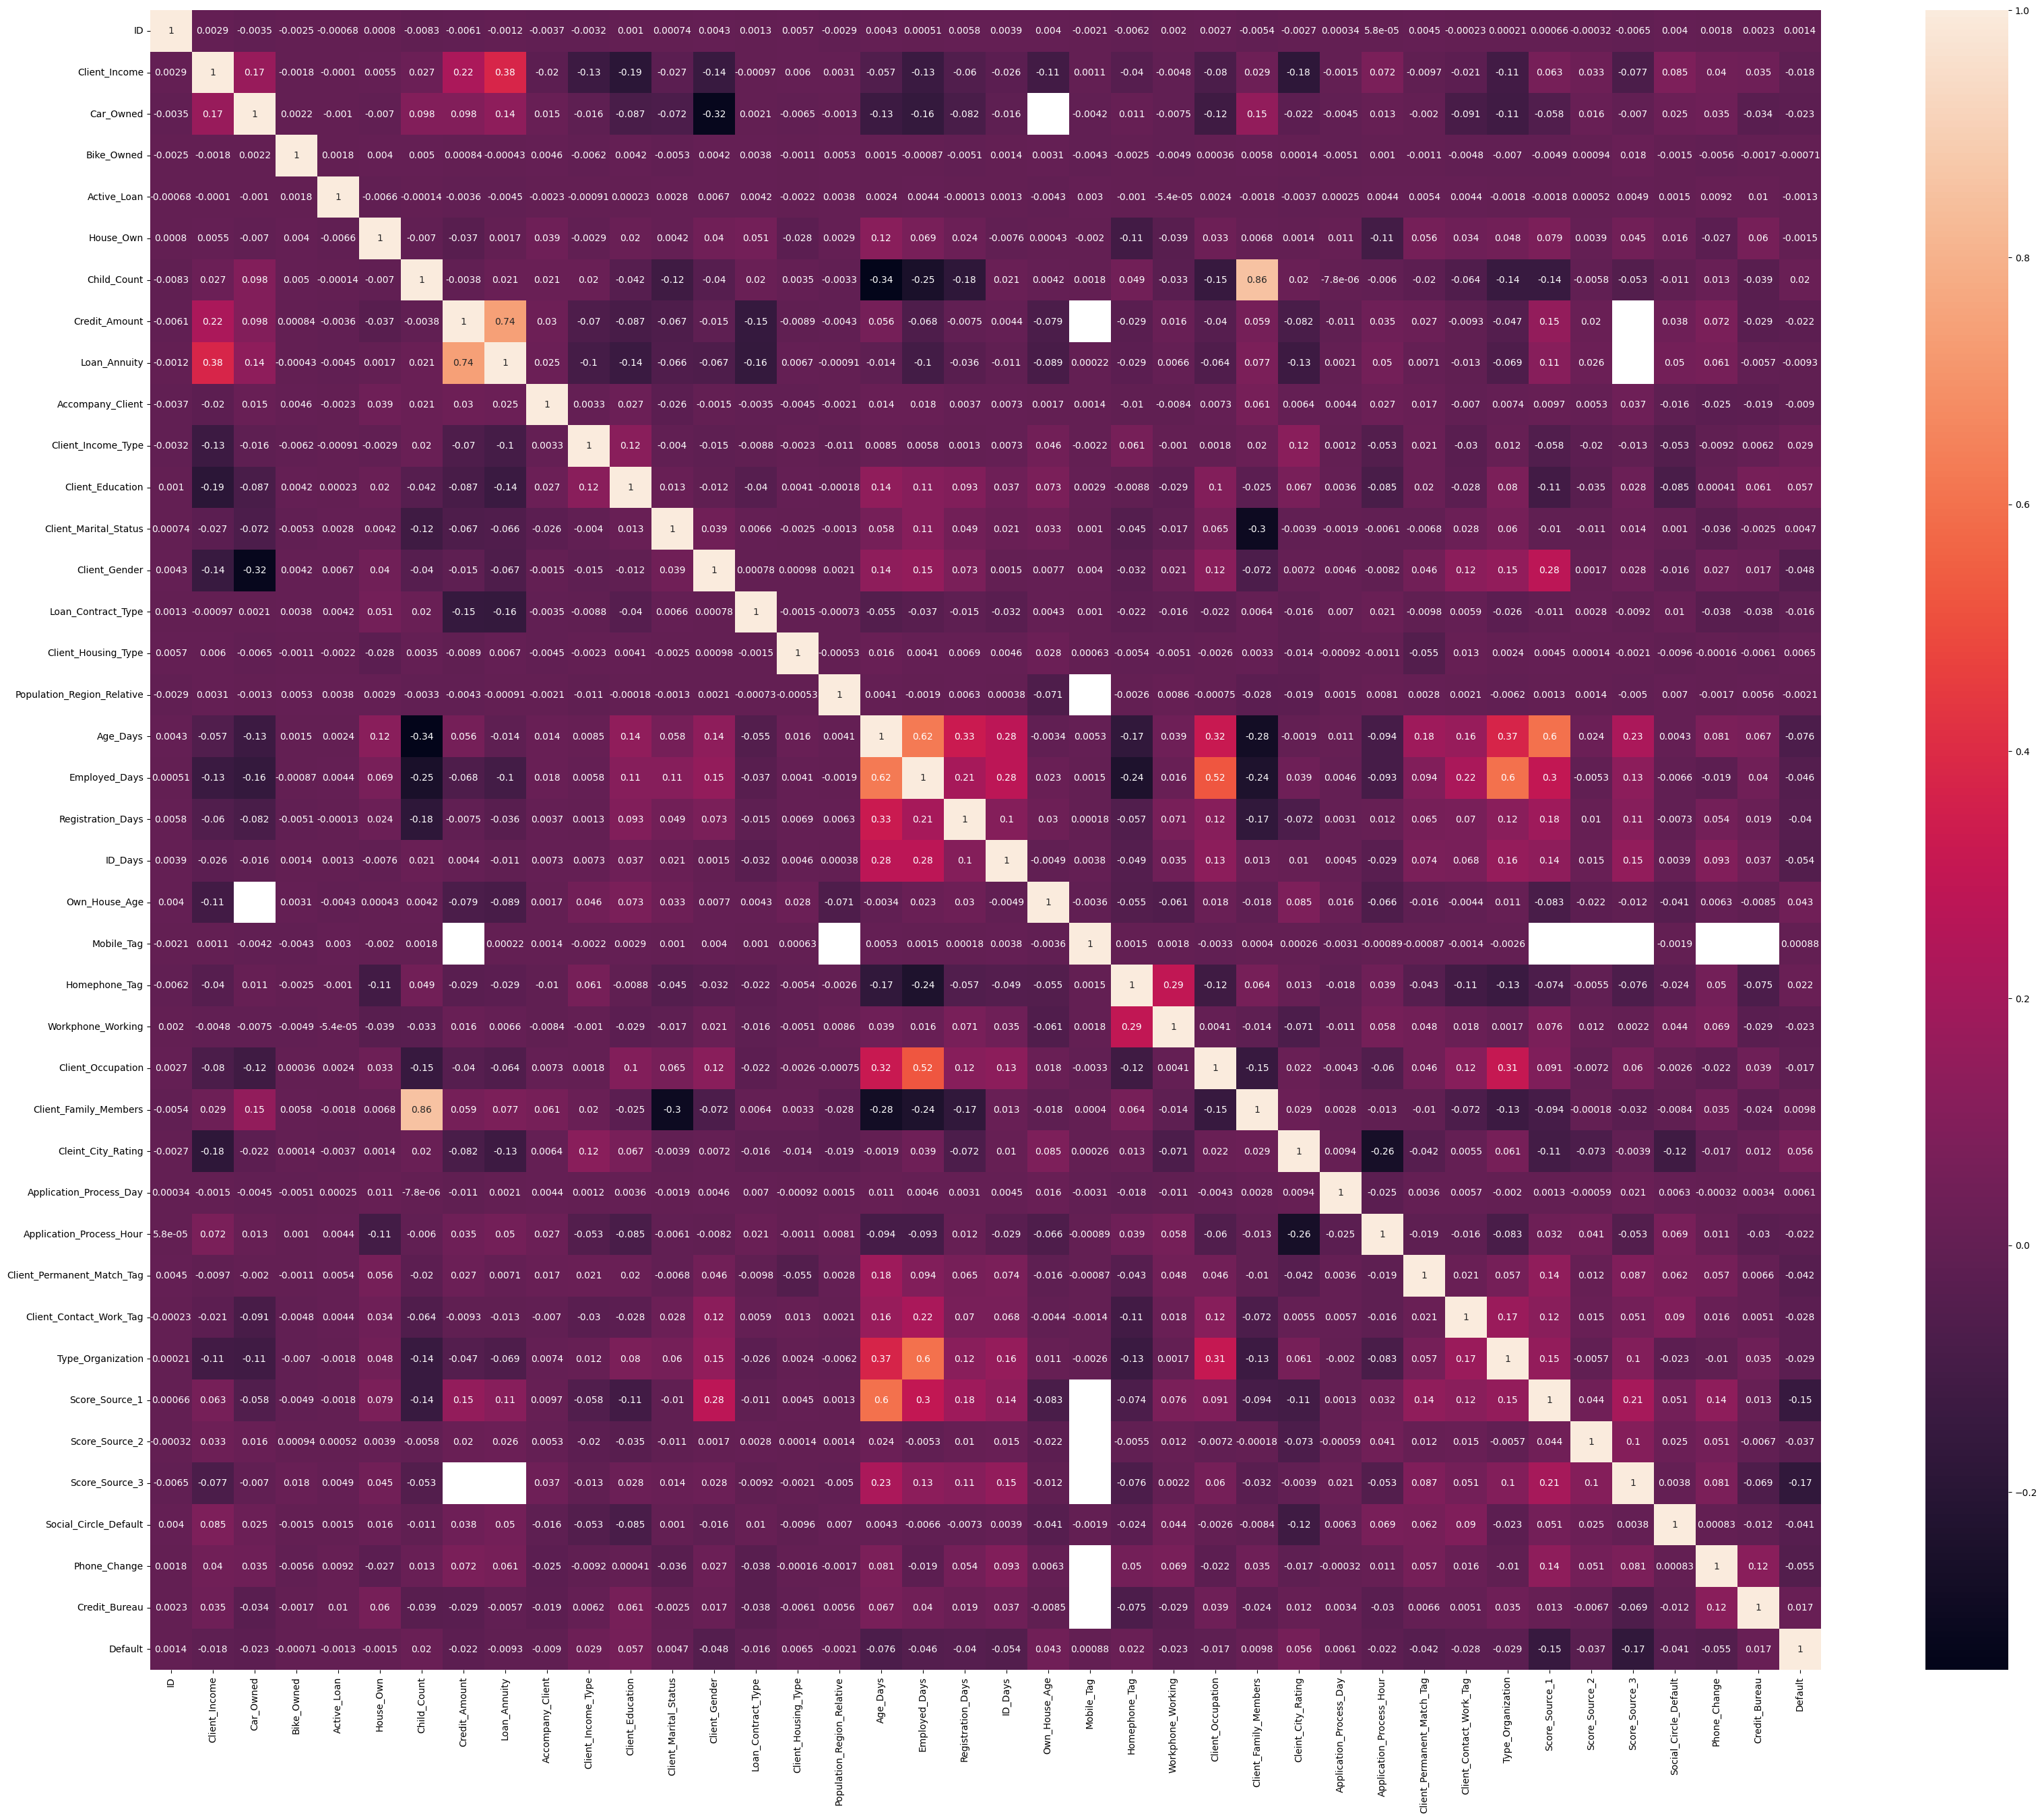

In [ ]:
# Correlation Heatmap - recreated with categorical features imputed so we can see relationships between all of the features after cleaning.
#correlation_matrix = df.corr()

#plt.figure(figsize=(40, 32))
#sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [ ]:
# Remove unnecessary columns
columns_to_remove = ["ID", "Score_Source_1", "Score_Source_2", "Score_Source_3"]
df = df.drop(columns=columns_to_remove)
# Test_df = Test_df.drop(columns=columns_to_remove)

In [ ]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=15, random_state=42)
# imputer_test = IterativeImputer(max_iter=15, random_state=42)

# Fit and transform the data using IterativeImputer
Iterative_imputer = imputer.fit_transform(df)
# Iterative_imputer_test = imputer_test.fit_transform(Test_df)

# Create a new DataFrame with imputed values
df = pd.DataFrame(Iterative_imputer, columns=df.columns)
# Test_df = pd.DataFrame(Iterative_imputer_test, columns=Test_df.columns)

# Check the total number of missing values in each column of the DataFrame
df.isna().sum()
# Test_df.isna().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Social_Circle_Default         0
Phone_Change                  0
Credit_Bureau                 0
Default                       0
dtype: int64

In [ ]:
# Step 2: Separate features and target
X = df.drop(columns=["Default"])
y = df["Default"]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the numerical features in the training set
numerical_features = ["Client_Income", "Car_Owned", "Bike_Owned", "Active_Loan", "House_Own",
                      "Child_Count", "Credit_Amount", "Loan_Annuity", "Population_Region_Relative",
                      "Age_Days", "Employed_Days", "Registration_Days", "ID_Days", "Own_House_Age",
                      "Mobile_Tag", "Homephone_Tag", "Workphone_Working", "Client_Family_Members",
                      "Cleint_City_Rating", "Application_Process_Day", "Application_Process_Hour",
                      "Social_Circle_Default", "Phone_Change", "Credit_Bureau"]

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
# Test_df[numerical_features] = scaler.transform(Test_df[numerical_features])

In [ ]:
# Calculate mutual information for each feature
mi = mutual_info_classif(X_train, y_train, random_state=42)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mi})

# Sort the DataFrame by Mutual Information score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

                       Feature  Mutual Information
30     Client_Contact_Work_Tag            0.016042
10            Client_Education            0.015496
29  Client_Permanent_Match_Tag            0.013030
7                 Loan_Annuity            0.011555
3                  Active_Loan            0.011260
23           Workphone_Working            0.010468
17               Employed_Days            0.010369
1                    Car_Owned            0.010272
12               Client_Gender            0.009279
16                    Age_Days            0.009048
9           Client_Income_Type            0.008610
11       Client_Marital_Status            0.008127
18           Registration_Days            0.008069
22               Homephone_Tag            0.007982
14         Client_Housing_Type            0.007713
2                   Bike_Owned            0.007136
32       Social_Circle_Default            0.006947
19                     ID_Days            0.006686
5                  Child_Count 

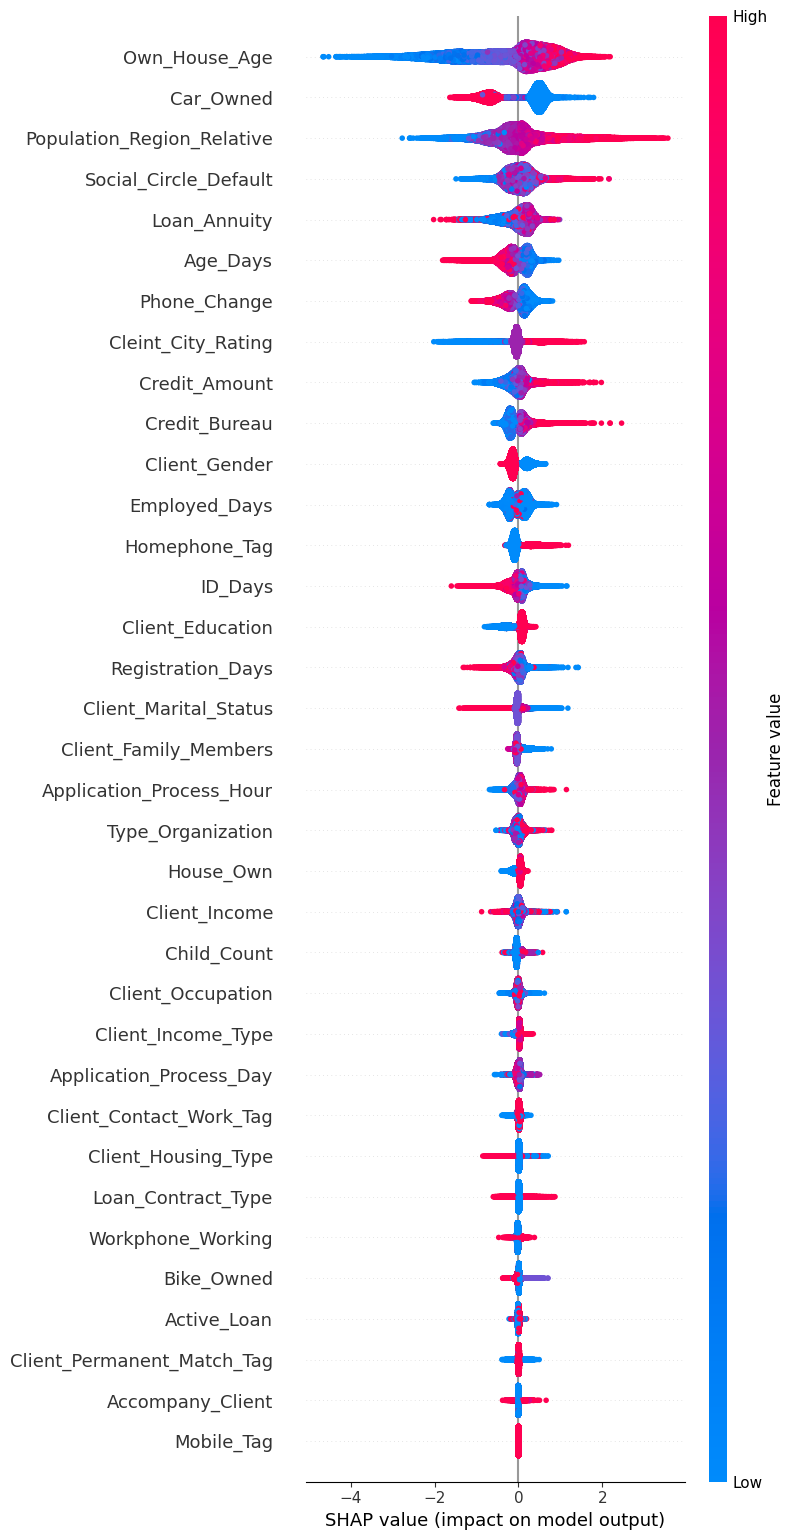

In [ ]:
import xgboost as xgb
import shap

# Train an XGBoost model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train, max_display=len(X_train.columns))

In [ ]:
# Combine MI and SHAP into a single DataFrame for comparison
shap_importance = pd.DataFrame({'Feature': X_train.columns,
                                'SHAP Importance': np.abs(shap_values).mean(axis=0)})
combined_df = pd.merge(mi_df, shap_importance, on='Feature')
combined_df = combined_df.sort_values(by='Mutual Information', ascending=False)

print(combined_df)

                       Feature  Mutual Information  SHAP Importance
0      Client_Contact_Work_Tag            0.016042         0.031752
1             Client_Education            0.015496         0.140758
2   Client_Permanent_Match_Tag            0.013030         0.017684
3                 Loan_Annuity            0.011555         0.248062
4                  Active_Loan            0.011260         0.017707
5            Workphone_Working            0.010468         0.029536
6                Employed_Days            0.010369         0.169591
7                    Car_Owned            0.010272         0.590874
8                Client_Gender            0.009279         0.176045
9                     Age_Days            0.009048         0.228018
10          Client_Income_Type            0.008610         0.045110
11       Client_Marital_Status            0.008127         0.075470
12           Registration_Days            0.008069         0.110416
13               Homephone_Tag            0.0079

#Experiment 1

*E1 Logistic Regression Classifier*

SMOTE Resampled Model Accuracy: 0.6747453459782227
SMOTE Resampled Confusion Matrix:
[[14139  6755]
 [  653  1229]]
SMOTE Resampled Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.79     20894
         1.0       0.15      0.65      0.25      1882

    accuracy                           0.67     22776
   macro avg       0.55      0.66      0.52     22776
weighted avg       0.89      0.67      0.75     22776



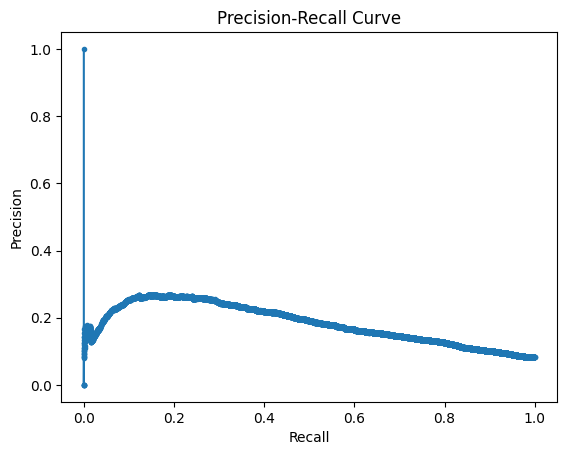

In [ ]:
#Experiment 1 - LR Base model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model with the resampled data
log_reg = LogisticRegression(max_iter=1500, solver='saga', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict probabilities with the model
y_prob = log_reg.predict_proba(X_test)[:, 1]
adjusted_threshold = 0.5  # Example threshold, adjust as needed
y_pred = (y_prob >= adjusted_threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'SMOTE Resampled Model Accuracy: {accuracy}')
print(f'SMOTE Resampled Confusion Matrix:\n{conf_matrix}')
print(f'SMOTE Resampled Classification Report:\n{class_report}')

# Calculate precision and recall for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
#Experiment 1 - Base model with top 20 MI and SHAP features selected
# Step 1: Feature Selection using Mutual Information (MI)
mi = mutual_info_classif(X_train, y_train, random_state=42)
mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi}).sort_values(by='MI Score', ascending=False)

# Select top N features based on MI
top_n_mi_features = mi_df['Feature'].head(20).tolist()
X_train_mi = X_train[top_n_mi_features]
X_test_mi = X_test[top_n_mi_features]


In [ ]:
# Step 2: Feature Selection using SHAP
# Train an XGBoost model for SHAP values
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# SHAP importance
shap_importance = pd.DataFrame({'Feature': X_train.columns, 'SHAP Importance': np.abs(shap_values).mean(axis=0)})
shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False)

# Select top N features based on SHAP
top_n_shap_features = shap_importance['Feature'].head(20).tolist()
X_train_shap = X_train[top_n_shap_features]
X_test_shap = X_test[top_n_shap_features]


In [ ]:
# Step 3: Apply SMOTE and Train Logistic Regression Model for MI selected features
smote = SMOTE(random_state=42)
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)

log_reg_mi = LogisticRegression(random_state=42, max_iter=250, solver='liblinear')
log_reg_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

y_prob_mi = log_reg_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi = (y_prob_mi >= adjusted_threshold).astype(int)

# Evaluate the MI-selected features model
accuracy_mi = accuracy_score(y_test, y_pred_mi)
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)
class_report_mi = classification_report(y_test, y_pred_mi)
auc_mi = roc_auc_score(y_test, y_prob_mi)

print(f'MI Selected Features Model Accuracy: {accuracy_mi}')
print(f'MI Selected Features AUC: {auc_mi}')
print(f'MI Selected Features Confusion Matrix:\n{conf_matrix_mi}')
print(f'MI Selected Features Classification Report:\n{class_report_mi}')



MI Selected Features Model Accuracy: 0.4599139445029856
MI Selected Features AUC: 0.6306527803363916
MI Selected Features Confusion Matrix:
[[ 9085 11809]
 [  492  1390]]
MI Selected Features Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.43      0.60     20894
         1.0       0.11      0.74      0.18      1882

    accuracy                           0.46     22776
   macro avg       0.53      0.59      0.39     22776
weighted avg       0.88      0.46      0.56     22776



In [ ]:
# Step 4: Apply SMOTE and Train Logistic Regression Model for SHAP selected features
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)

log_reg_shap = LogisticRegression(random_state=42, max_iter=250, solver='liblinear')
log_reg_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

y_prob_shap = log_reg_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap = (y_prob_shap >= adjusted_threshold).astype(int)

# Evaluate the SHAP-selected features model
accuracy_shap = accuracy_score(y_test, y_pred_shap)
conf_matrix_shap = confusion_matrix(y_test, y_pred_shap)
class_report_shap = classification_report(y_test, y_pred_shap)
auc_shap = roc_auc_score(y_test, y_prob_shap)

print(f'SHAP Selected Features Model Accuracy: {accuracy_shap}')
print(f'SHAP Selected Features AUC: {auc_shap}')
print(f'SHAP Selected Features Confusion Matrix:\n{conf_matrix_shap}')
print(f'SHAP Selected Features Classification Report:\n{class_report_shap}')



SHAP Selected Features Model Accuracy: 0.5284949069195645
SHAP Selected Features AUC: 0.683058237282322
SHAP Selected Features Confusion Matrix:
[[10644 10250]
 [  489  1393]]
SHAP Selected Features Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.51      0.66     20894
         1.0       0.12      0.74      0.21      1882

    accuracy                           0.53     22776
   macro avg       0.54      0.62      0.44     22776
weighted avg       0.89      0.53      0.63     22776



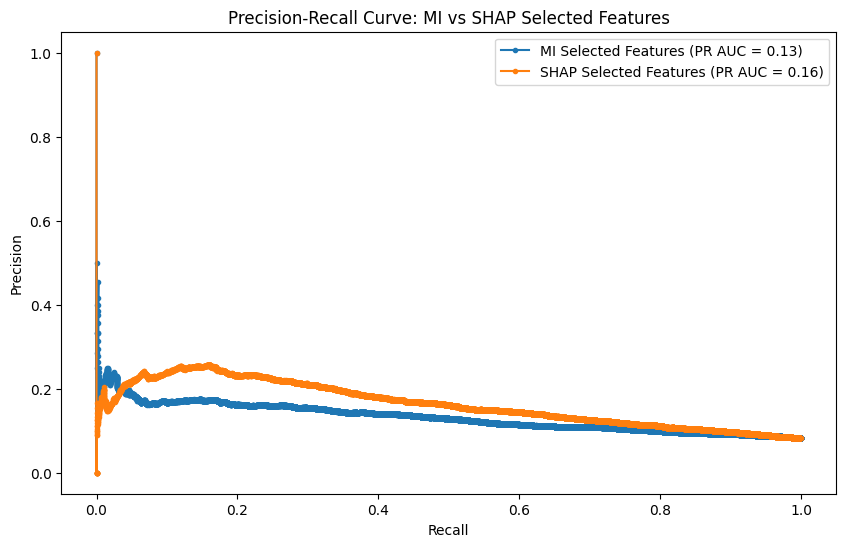

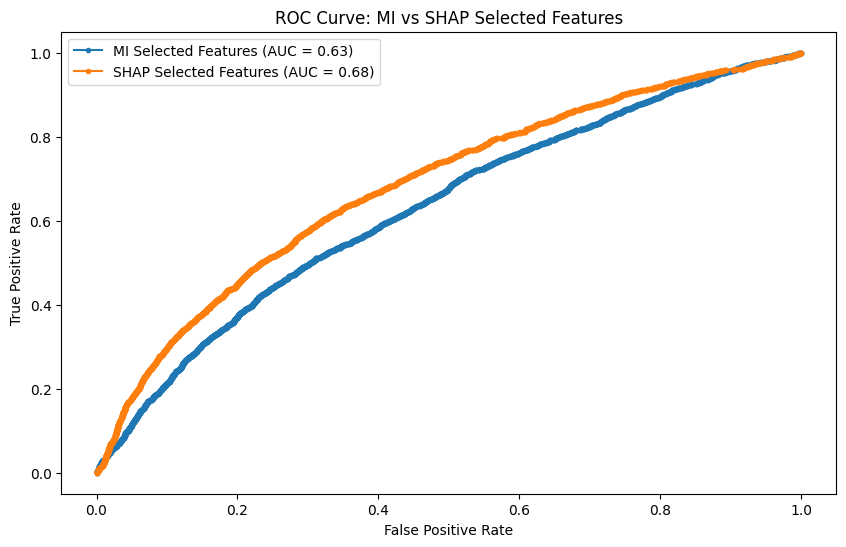

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Step 5: Plot Precision-Recall Curve and ROC Curve for both models

# Calculate Precision-Recall values for both models
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap)

# Calculate the PR AUC for both models
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

# Plot the Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

 *E1 Random Forest Classifier*

SMOTE Resampled Model Accuracy: 0.8677116262732701
SMOTE Resampled Confusion Matrix:
[[19435  1459]
 [ 1554   328]]
SMOTE Resampled Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     20894
         1.0       0.18      0.17      0.18      1882

    accuracy                           0.87     22776
   macro avg       0.55      0.55      0.55     22776
weighted avg       0.86      0.87      0.87     22776



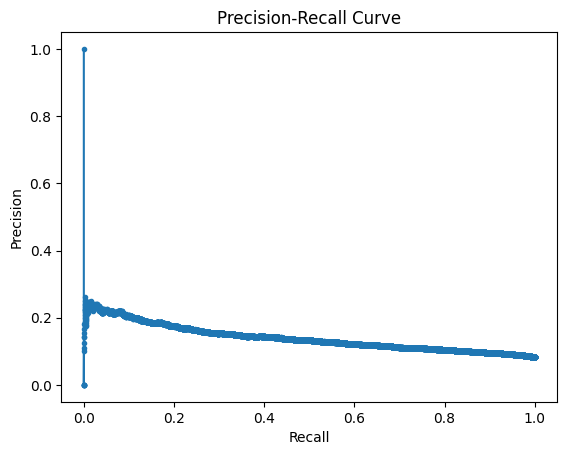

In [ ]:
# Experiment 1 - Random Forest base model

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model with the resampled data
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Predict probabilities with the model
y_prob = rf.predict_proba(X_test)[:, 1]
adjusted_threshold = 0.5  # Example threshold, adjust as needed
y_pred = (y_prob >= adjusted_threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'SMOTE Resampled Model Accuracy: {accuracy}')
print(f'SMOTE Resampled Confusion Matrix:\n{conf_matrix}')
print(f'SMOTE Resampled Classification Report:\n{class_report}')

# Calculate precision and recall for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Note: Step 1 and Step 2 can be skipped as we already calculated MI and SHAP values which will not change.

# Step 3: Apply SMOTE and Train Random Forest Model for MI selected features
smote = SMOTE(random_state=42)
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)

# Initialize the Random Forest classifier
rf_mi = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the resampled MI-selected features
rf_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

# Predict probabilities with the trained model
y_prob_mi = rf_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi = (y_prob_mi >= adjusted_threshold).astype(int)

# Evaluate the MI-selected features model
accuracy_mi = accuracy_score(y_test, y_pred_mi)
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)
class_report_mi = classification_report(y_test, y_pred_mi)
auc_mi = roc_auc_score(y_test, y_prob_mi)

print(f'MI Selected Features Model Accuracy: {accuracy_mi}')
print(f'MI Selected Features AUC: {auc_mi}')
print(f'MI Selected Features Confusion Matrix:\n{conf_matrix_mi}')
print(f'MI Selected Features Classification Report:\n{class_report_mi}')

MI Selected Features Model Accuracy: 0.8297769582016158
MI Selected Features AUC: 0.6360917772589684
MI Selected Features Confusion Matrix:
[[18439  2455]
 [ 1422   460]]
MI Selected Features Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90     20894
         1.0       0.16      0.24      0.19      1882

    accuracy                           0.83     22776
   macro avg       0.54      0.56      0.55     22776
weighted avg       0.86      0.83      0.85     22776



In [ ]:
# Step 4: Apply SMOTE and Train Random Forest Model for SHAP selected features
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)

# Initialize the Random Forest classifier
rf_shap = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the resampled SHAP-selected features
rf_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

# Predict probabilities with the trained model
y_prob_shap = rf_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap = (y_prob_shap >= adjusted_threshold).astype(int)

# Evaluate the SHAP-selected features model
accuracy_shap = accuracy_score(y_test, y_pred_shap)
conf_matrix_shap = confusion_matrix(y_test, y_pred_shap)
class_report_shap = classification_report(y_test, y_pred_shap)
auc_shap = roc_auc_score(y_test, y_prob_shap)

print(f'SHAP Selected Features Model Accuracy: {accuracy_shap}')
print(f'SHAP Selected Features AUC: {auc_shap}')
print(f'SHAP Selected Features Confusion Matrix:\n{conf_matrix_shap}')
print(f'SHAP Selected Features Classification Report:\n{class_report_shap}')

SHAP Selected Features Model Accuracy: 0.7986037934668072
SHAP Selected Features AUC: 0.6550354570466359
SHAP Selected Features Confusion Matrix:
[[17578  3316]
 [ 1271   611]]
SHAP Selected Features Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88     20894
         1.0       0.16      0.32      0.21      1882

    accuracy                           0.80     22776
   macro avg       0.54      0.58      0.55     22776
weighted avg       0.87      0.80      0.83     22776



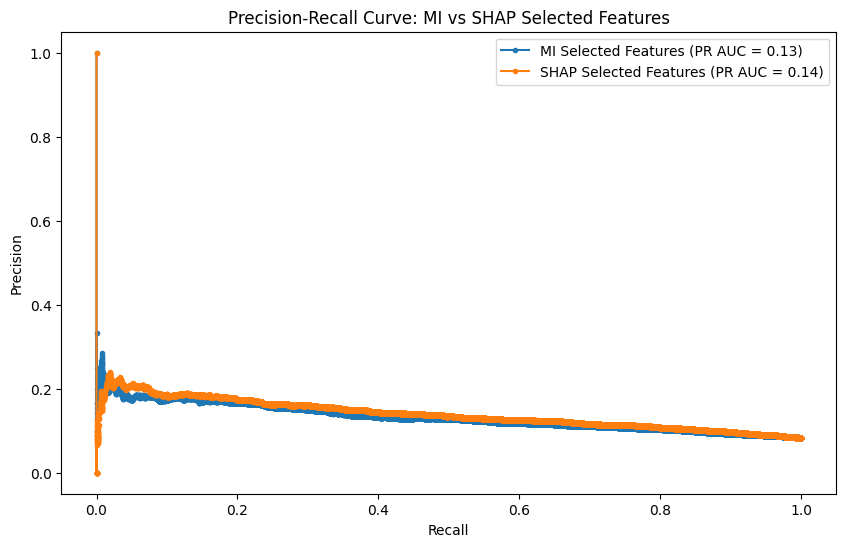

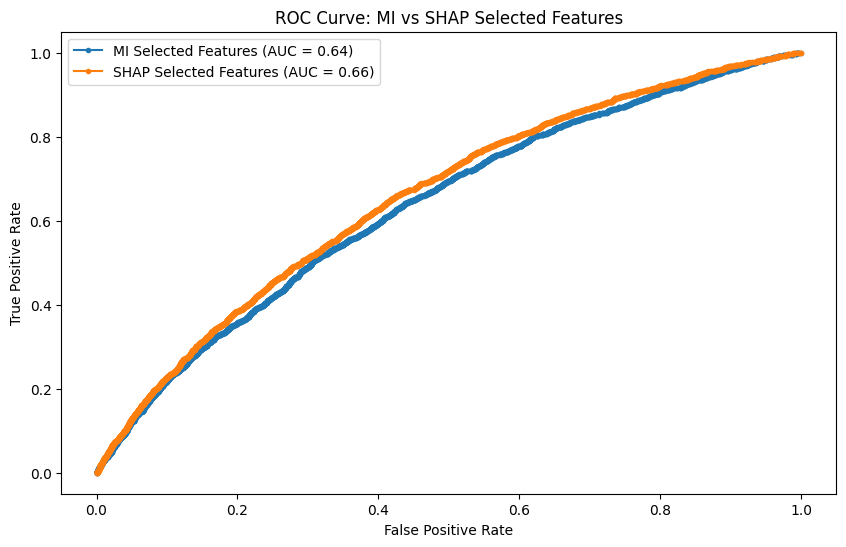

In [ ]:
# Step 5: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()


*E1 XGBoost Classifier*

SMOTE Resampled Model Accuracy: 0.9165788549350193
SMOTE Resampled AUC: 0.716290641990587
SMOTE Resampled Confusion Matrix:
[[20792   102]
 [ 1798    84]]
SMOTE Resampled Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     20894
         1.0       0.45      0.04      0.08      1882

    accuracy                           0.92     22776
   macro avg       0.69      0.52      0.52     22776
weighted avg       0.88      0.92      0.88     22776



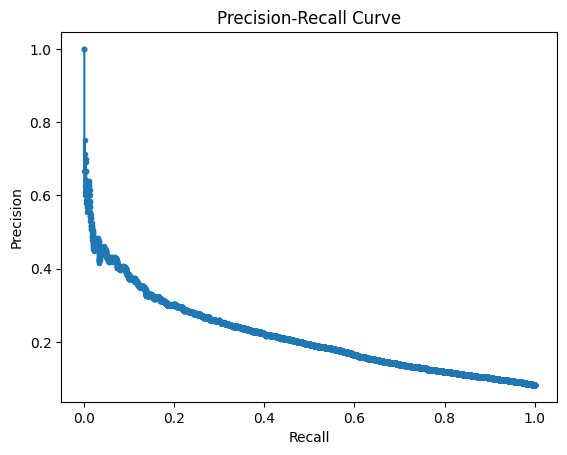

In [ ]:
# Experiment 1 - XGBoost Model base

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model with the resampled data
xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Predict probabilities with the model
y_prob = xgb.predict_proba(X_test)[:, 1]
adjusted_threshold = 0.5  # Example threshold, adjust as needed
y_pred = (y_prob >= adjusted_threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'SMOTE Resampled Model Accuracy: {accuracy}')
print(f'SMOTE Resampled AUC: {auc}')
print(f'SMOTE Resampled Confusion Matrix:\n{conf_matrix}')
print(f'SMOTE Resampled Classification Report:\n{class_report}')

# Calculate precision and recall for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Note: Step 1 and Step 2 can be skipped as we already calculated MI and SHAP values which will not change.

# Step 3: Apply SMOTE and Train XGBoost Model for MI selected features
smote = SMOTE(random_state=42)
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)

# Initialize the XGBoost classifier
xgb_mi = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)

# Train the model on the resampled MI-selected features
xgb_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

# Predict probabilities with the trained model
y_prob_mi = xgb_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi = (y_prob_mi >= adjusted_threshold).astype(int)

# Evaluate the MI-selected features model
accuracy_mi = accuracy_score(y_test, y_pred_mi)
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)
class_report_mi = classification_report(y_test, y_pred_mi)
auc_mi = roc_auc_score(y_test, y_prob_mi)

print(f'MI Selected Features Model Accuracy: {accuracy_mi}')
print(f'MI Selected Features AUC: {auc_mi}')
print(f'MI Selected Features Confusion Matrix:\n{conf_matrix_mi}')
print(f'MI Selected Features Classification Report:\n{class_report_mi}')

MI Selected Features Model Accuracy: 0.8922550052687039
MI Selected Features AUC: 0.6287813457880154
MI Selected Features Confusion Matrix:
[[20183   711]
 [ 1743   139]]
MI Selected Features Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     20894
         1.0       0.16      0.07      0.10      1882

    accuracy                           0.89     22776
   macro avg       0.54      0.52      0.52     22776
weighted avg       0.86      0.89      0.87     22776



In [ ]:
# Step 4: Apply SMOTE and Train XGBoost Model for SHAP selected features
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)

# Initialize the XGBoost classifier
xgb_shap = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)

# Train the model on the resampled SHAP-selected features
xgb_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

# Predict probabilities with the trained model
y_prob_shap = xgb_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap = (y_prob_shap >= adjusted_threshold).astype(int)

# Evaluate the SHAP-selected features model
accuracy_shap = accuracy_score(y_test, y_pred_shap)
conf_matrix_shap = confusion_matrix(y_test, y_pred_shap)
class_report_shap = classification_report(y_test, y_pred_shap)
auc_shap = roc_auc_score(y_test, y_prob_shap)

print(f'SHAP Selected Features Model Accuracy: {accuracy_shap}')
print(f'SHAP Selected Features AUC: {auc_shap}')
print(f'SHAP Selected Features Confusion Matrix:\n{conf_matrix_shap}')
print(f'SHAP Selected Features Classification Report:\n{class_report_shap}')


SHAP Selected Features Model Accuracy: 0.9036266245170355
SHAP Selected Features AUC: 0.70251621539501
SHAP Selected Features Confusion Matrix:
[[20392   502]
 [ 1693   189]]
SHAP Selected Features Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     20894
         1.0       0.27      0.10      0.15      1882

    accuracy                           0.90     22776
   macro avg       0.60      0.54      0.55     22776
weighted avg       0.87      0.90      0.88     22776



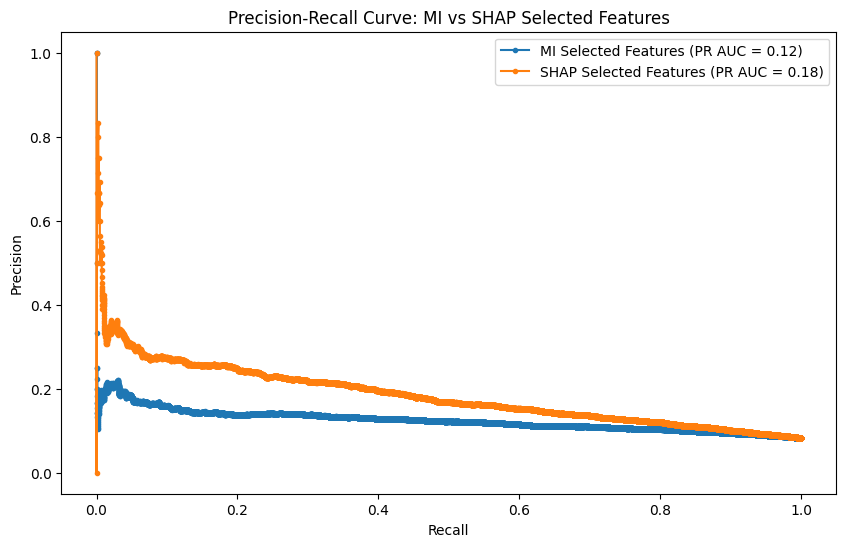

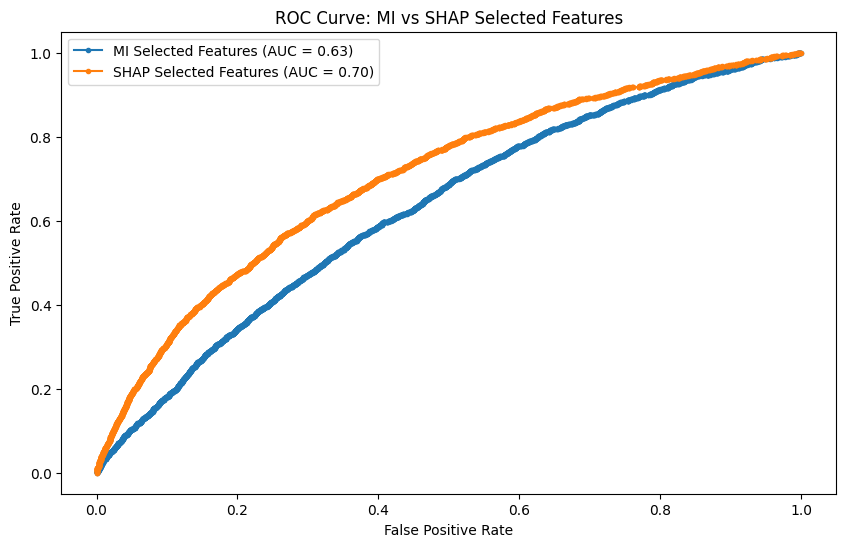

In [ ]:
# Step 5: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()


*E1 Stacking Classifier*

SMOTE Resampled Stacking Model Accuracy: 0.9091148577449948
SMOTE Resampled Stacking Model AUC: 0.7354237934162287
SMOTE Resampled Stacking Model Confusion Matrix:
[[20428   466]
 [ 1604   278]]
SMOTE Resampled Stacking Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     20894
         1.0       0.37      0.15      0.21      1882

    accuracy                           0.91     22776
   macro avg       0.65      0.56      0.58     22776
weighted avg       0.88      0.91      0.89     22776



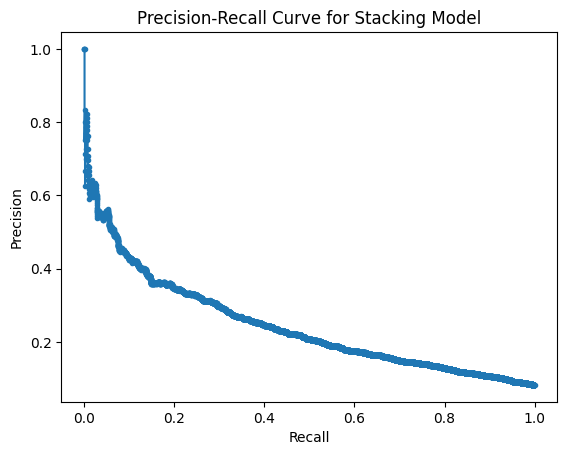

In [ ]:
# Experiment 1 - Stacking Classifier base model

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the base models
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
log_reg = LogisticRegression(max_iter=1500, solver='saga', random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)

# Define the meta-model
meta_log_reg = LogisticRegression(max_iter=1500, solver='liblinear', random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', log_reg),
        ('xgb', xgb)
    ],
    final_estimator=meta_log_reg,
    cv=5
)

# Train the stacking classifier on the resampled data
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Predict probabilities with the stacking model
y_prob = stacking_clf.predict_proba(X_test)[:, 1]
adjusted_threshold = 0.44  # Example threshold, adjust as needed
y_pred = (y_prob >= adjusted_threshold).astype(int)

# Evaluate the stacking model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'SMOTE Resampled Stacking Model Accuracy: {accuracy}')
print(f'SMOTE Resampled Stacking Model AUC: {auc}')
print(f'SMOTE Resampled Stacking Model Confusion Matrix:\n{conf_matrix}')
print(f'SMOTE Resampled Stacking Model Classification Report:\n{class_report}')

# Calculate precision and recall for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Stacking Model')
plt.show()

In [ ]:
# Note: Step 1 and Step 2 can be skipped as we already calculated MI and SHAP values which will not change.

# Step 3: Apply SMOTE and Train Stacking Classifier for MI selected features
smote = SMOTE(random_state=42)
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)

# Define the base models
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
log_reg = LogisticRegression(max_iter=1500, solver='saga', random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)

# Define the meta-model
meta_log_reg = LogisticRegression(max_iter=1500, solver='liblinear', random_state=42)

# Create the stacking classifier
stacking_clf_mi = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', log_reg),
        ('xgb', xgb)
    ],
    final_estimator=meta_log_reg,
    cv=5
)

# Train the stacking classifier on the resampled MI-selected features
stacking_clf_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

# Predict probabilities with the stacking model
y_prob_mi = stacking_clf_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi = (y_prob_mi >= adjusted_threshold).astype(int)

# Evaluate the MI-selected features stacking model
accuracy_mi = accuracy_score(y_test, y_pred_mi)
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)
class_report_mi = classification_report(y_test, y_pred_mi)
auc_mi = roc_auc_score(y_test, y_prob_mi)

print(f'MI Selected Features Stacking Model Accuracy: {accuracy_mi}')
print(f'MI Selected Features Stacking Model AUC: {auc_mi}')
print(f'MI Selected Features Stacking Model Confusion Matrix:\n{conf_matrix_mi}')
print(f'MI Selected Features Stacking Model Classification Report:\n{class_report_mi}')

MI Selected Features Stacking Model Accuracy: 0.8740340709518791
MI Selected Features Stacking Model AUC: 0.617185734948544
MI Selected Features Stacking Model Confusion Matrix:
[[19693  1201]
 [ 1668   214]]
MI Selected Features Stacking Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     20894
         1.0       0.15      0.11      0.13      1882

    accuracy                           0.87     22776
   macro avg       0.54      0.53      0.53     22776
weighted avg       0.86      0.87      0.87     22776



In [ ]:
# Step 4: Apply SMOTE and Train Stacking Classifier for SHAP selected features
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)

# Define the base models
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
log_reg = LogisticRegression(max_iter=1500, solver='saga', random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)

# Define the meta-model
meta_log_reg = LogisticRegression(max_iter=1500, solver='liblinear', random_state=42)

# Create the stacking classifier
stacking_clf_shap = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', log_reg),
        ('xgb', xgb)
    ],
    final_estimator=meta_log_reg,
    cv=5
)

# Train the stacking classifier on the resampled SHAP-selected features
stacking_clf_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

# Predict probabilities with the stacking model
y_prob_shap = stacking_clf_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap = (y_prob_shap >= adjusted_threshold).astype(int)

# Evaluate the SHAP-selected features stacking model
accuracy_shap = accuracy_score(y_test, y_pred_shap)
conf_matrix_shap = confusion_matrix(y_test, y_pred_shap)
class_report_shap = classification_report(y_test, y_pred_shap)
auc_shap = roc_auc_score(y_test, y_prob_shap)

print(f'SHAP Selected Features Stacking Model Accuracy: {accuracy_shap}')
print(f'SHAP Selected Features Stacking Model AUC: {auc_shap}')
print(f'SHAP Selected Features Stacking Model Confusion Matrix:\n{conf_matrix_shap}')
print(f'SHAP Selected Features Stacking Model Classification Report:\n{class_report_shap}')

SHAP Selected Features Stacking Model Accuracy: 0.8954162276080084
SHAP Selected Features Stacking Model AUC: 0.7120280832545066
SHAP Selected Features Stacking Model Confusion Matrix:
[[20102   792]
 [ 1590   292]]
SHAP Selected Features Stacking Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     20894
         1.0       0.27      0.16      0.20      1882

    accuracy                           0.90     22776
   macro avg       0.60      0.56      0.57     22776
weighted avg       0.87      0.90      0.88     22776



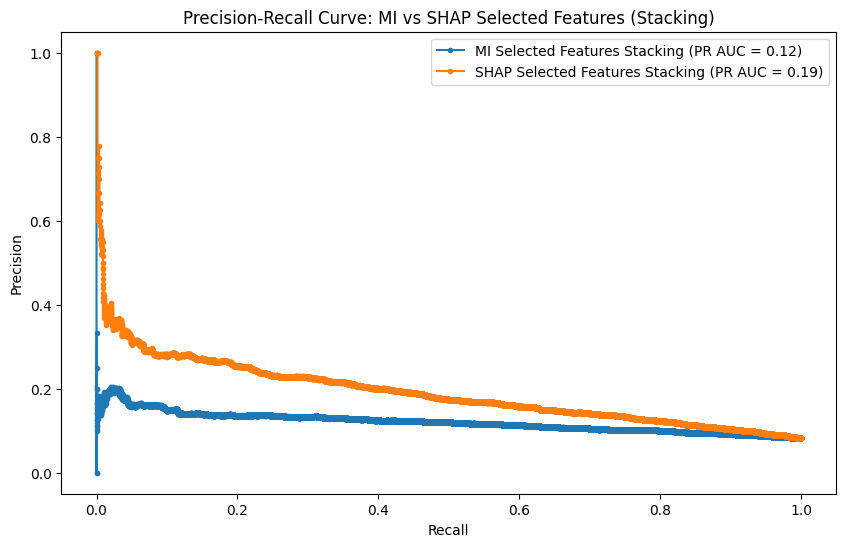

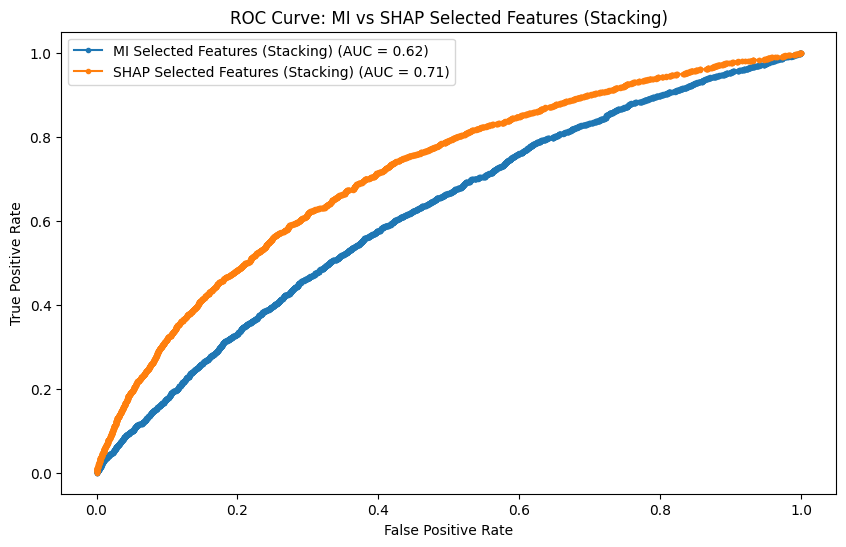

In [ ]:
# Step 5: Plot Precision-Recall Curve and ROC Curve for both stacking models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features Stacking (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features Stacking (PR AUC = {pr_auc_shap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features (Stacking)')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (Stacking) (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (Stacking) (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features (Stacking)')
plt.legend()
plt.show()

#Experiment 2 & 3 prep

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_auc_score, classification_report
import shap
import numpy as np
import pandas as pd

In [ ]:
# Step 1: Calculate MI Scores for Feature Selection
mi_scores = mutual_info_classif(X_train, y_train)
mi_importance_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})
mi_importance_df = mi_importance_df.sort_values(by='MI Score', ascending=False)
mi_importance_df['Cumulative MI'] = mi_importance_df['MI Score'].cumsum() / mi_importance_df['MI Score'].sum()

# Select features contributing to 90% of MI importance
selected_features_mi = mi_importance_df[mi_importance_df['Cumulative MI'] <= 0.9]['Feature']


In [ ]:
print(f"Selected features based on MI importance:\n{selected_features_mi}")

Selected features based on MI importance:
10              Client_Education
30       Client_Contact_Work_Tag
29    Client_Permanent_Match_Tag
7                   Loan_Annuity
3                    Active_Loan
17                 Employed_Days
22                 Homephone_Tag
12                 Client_Gender
11         Client_Marital_Status
9             Client_Income_Type
23             Workphone_Working
16                      Age_Days
4                      House_Own
1                      Car_Owned
18             Registration_Days
2                     Bike_Owned
14           Client_Housing_Type
5                    Child_Count
19                       ID_Days
32         Social_Circle_Default
24             Client_Occupation
33                  Phone_Change
31             Type_Organization
Name: Feature, dtype: object


In [ ]:
# Step 4: Train XGBoost Model and Calculate SHAP Values for Feature Selection
xgb_model = XGBClassifier(n_estimators=100, max_depth=10, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Calculate SHAP values using TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

In [ ]:
# Step 3: Confirm the SHAP values shape and reduce the third dimension by taking the mean over it
print(f"Type of shap_values: {type(shap_values)}")
print(f"Shape of shap_values array: {shap_values.shape}")

# For XGBoost binary classification, shap_values should be 2D (n_samples, n_features)
if shap_values.ndim == 2:
    shap_values_mean = shap_values
elif shap_values.ndim == 3 and shap_values.shape[2] == 2:
    shap_values_mean = shap_values.mean(axis=2)
else:
    raise ValueError("SHAP values are not in the expected format.")

# Verify the reduced shape
print(f"Shape of shap_values_mean after reducing: {shap_values_mean.shape}")

Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values array: (91101, 35)
Shape of shap_values_mean after reducing: (91101, 35)


In [ ]:
# Step 4: Calculate mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values_mean).mean(axis=0)
shap_importance_df = pd.DataFrame({'Feature': X_train.columns, 'SHAP Importance': shap_importance})
shap_importance_df = shap_importance_df.sort_values(by='SHAP Importance', ascending=False)
shap_importance_df['Cumulative SHAP'] = shap_importance_df['SHAP Importance'].cumsum() / shap_importance_df['SHAP Importance'].sum()

# Select features contributing to 90% of SHAP importance
selected_features_shap = shap_importance_df[shap_importance_df['Cumulative SHAP'] <= 0.9]['Feature']



In [ ]:
# Step 5: Reduce the training and test datasets to the selected features
X_train_shap = X_train[selected_features_shap]
X_test_shap = X_test[selected_features_shap]

X_train_mi = X_train[selected_features_mi]
X_test_mi = X_test[selected_features_mi]

print(f"Selected features based on SHAP importance:\n{selected_features_shap}")

Selected features based on SHAP importance:
20                 Own_House_Age
1                      Car_Owned
15    Population_Region_Relative
32         Social_Circle_Default
33                  Phone_Change
7                   Loan_Annuity
16                      Age_Days
6                  Credit_Amount
26            Cleint_City_Rating
34                 Credit_Bureau
17                 Employed_Days
19                       ID_Days
12                 Client_Gender
18             Registration_Days
22                 Homephone_Tag
10              Client_Education
28      Application_Process_Hour
4                      House_Own
0                  Client_Income
31             Type_Organization
24             Client_Occupation
Name: Feature, dtype: object


#Experiment 2

*E2 Logistic Regression*

In [ ]:
# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE for SHAP and MI selected features
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)


In [ ]:
# Step 2: Define the parameter grid for Logistic Regression
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['liblinear', 'saga'],
     'penalty': ['l1', 'l2'],
     'max_iter': [100, 200, 500, 1000],
     'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}]},
    {'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['newton-cg'],
     'penalty': ['l2'],  # Only L2 is compatible with 'newton-cg'
     'max_iter': [100, 200, 500, 1000],
     'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}]}
]

In [ ]:
# Step 3: Random Grid Search on SHAP-Selected Features
log_reg_shap = LogisticRegression(class_weight='balanced', random_state=42)

# Randomized Search on SHAP-Selected Features
random_search_shap = RandomizedSearchCV(
    log_reg,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings that are sampled. Can be adjusted.
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
# Fit the RandomizedSearchCV on the SHAP-selected features
random_search_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

# Extract the best parameters and score
best_params_shap = random_search_shap.best_params_
best_score_shap = random_search_shap.best_score_

print("Best parameters for SHAP-selected features:")
print(best_params_shap)
print(f"Best ROC AUC score for SHAP-selected features: {best_score_shap:.4f}")

Best parameters for SHAP-selected features:
{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'class_weight': {0: 1, 1: 5}, 'C': 10}
Best ROC AUC score for SHAP-selected features: 0.7193


In [ ]:
# Step 4: Randomized Grid Search on MI-Selected Features
# Initialize Logistic Regression model
log_reg_mi = LogisticRegression(class_weight='balanced', random_state=42)

# Randomized Search on MI-Selected Features
random_search_mi = RandomizedSearchCV(
    log_reg,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings that are sampled. Can be adjusted.
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
# Fit the RandomizedSearchCV on the MI-selected features
random_search_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

# Extract the best parameters and score
best_params_mi = random_search_mi.best_params_
best_score_mi = random_search_mi.best_score_

print("Best parameters for MI-selected features:")
print(best_params_mi)
print(f"Best ROC AUC score for MI-selected features: {best_score_mi:.4f}")

Best parameters for MI-selected features:
{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'class_weight': {0: 1, 1: 2}, 'C': 10}
Best ROC AUC score for MI-selected features: 0.6695


In [ ]:
# Step 5: Retrieve the best models from the Randomized Search results
best_model_shap = random_search_shap.best_estimator_
best_model_mi = random_search_mi.best_estimator_

X_test_shap = X_test[selected_features_shap]
X_test_mi = X_test[selected_features_mi]

# Step 6: Predict and evaluate the best SHAP model
y_prob_shap_best = best_model_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap_best = (y_prob_shap_best >= 0.5).astype(int)

accuracy_shap_best = accuracy_score(y_test, y_pred_shap_best)
auc_shap_best = roc_auc_score(y_test, y_prob_shap_best)

print(f"Best SHAP Model Accuracy: {accuracy_shap_best:.4f}")
print(f"Best SHAP Model AUC: {auc_shap_best:.4f}")

# Step 7: Predict and evaluate the best MI model
y_prob_mi_best = best_model_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi_best = (y_prob_mi_best >= 0.5).astype(int)

accuracy_mi_best = accuracy_score(y_test, y_pred_mi_best)
auc_mi_best = roc_auc_score(y_test, y_prob_mi_best)

print(f"Best MI Model Accuracy: {accuracy_mi_best:.4f}")
print(f"Best MI Model AUC: {auc_mi_best:.4f}")

Best SHAP Model Accuracy: 0.1380
Best SHAP Model AUC: 0.6857
Best MI Model Accuracy: 0.2711
Best MI Model AUC: 0.6378


In [ ]:
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_best))
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_best))

Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.96      0.06      0.12     20894
         1.0       0.09      0.97      0.16      1882

    accuracy                           0.14     22776
   macro avg       0.52      0.52      0.14     22776
weighted avg       0.89      0.14      0.12     22776

Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.96      0.21      0.35     20894
         1.0       0.09      0.89      0.17      1882

    accuracy                           0.27     22776
   macro avg       0.53      0.55      0.26     22776
weighted avg       0.89      0.27      0.34     22776



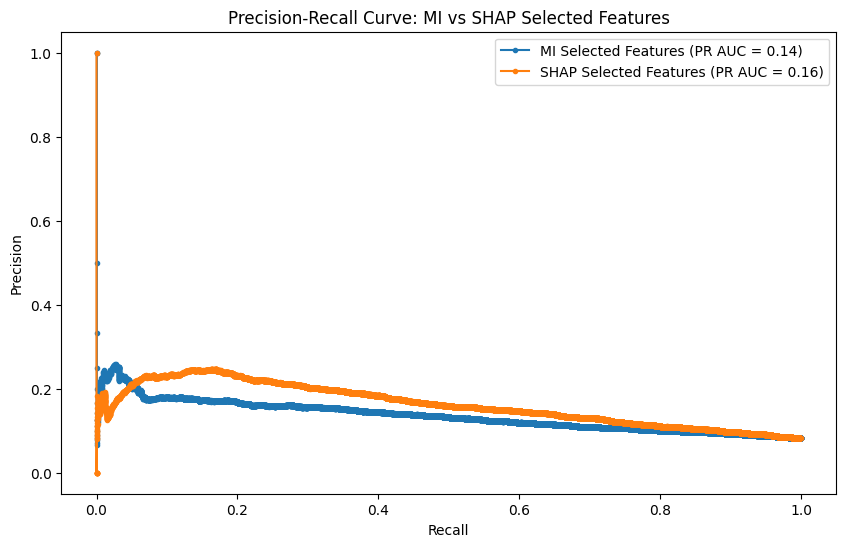

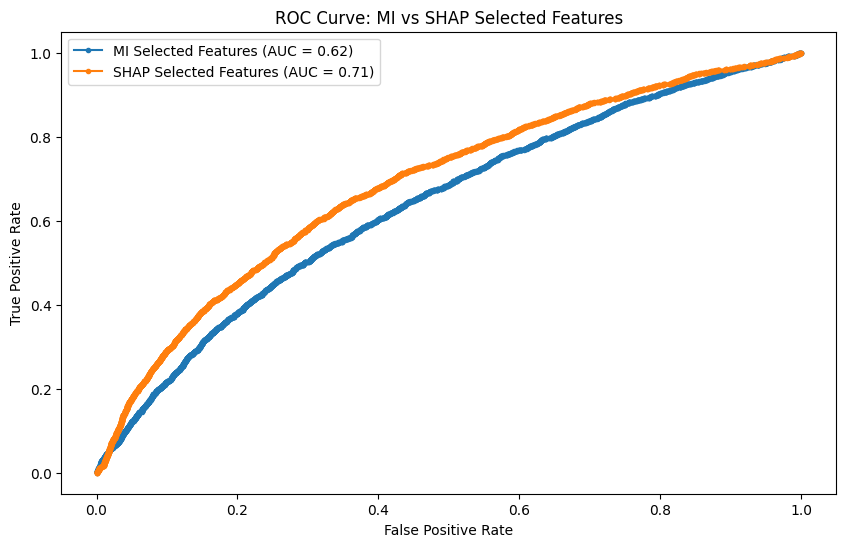

In [ ]:
# Step 8: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi_best)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap_best)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi_best)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

In [ ]:
# Step 9: Adjust the decision threshold
y_prob_shap = best_model_shap.predict_proba(X_test[selected_features_shap])[:, 1]
y_prob_mi = best_model_mi.predict_proba(X_test[selected_features_mi])[:, 1]

# Step 10: Calculate Precision-Recall Curve
precision_shap, recall_shap, thresholds_shap = precision_recall_curve(y_test, y_prob_shap)
precision_mi, recall_mi, thresholds_mi = precision_recall_curve(y_test, y_prob_mi)

In [ ]:
# Step 11: Find the optimal threshold using F1 score (or other metrics)
# Prevent divide-by-zero issues in F1 score calculation
fscore_shap = np.where((precision_shap + recall_shap) == 0, 0, 2 * (precision_shap * recall_shap) / (precision_shap + recall_shap))
fscore_mi = np.where((precision_mi + recall_mi) == 0, 0, 2 * (precision_mi * recall_mi) / (precision_mi + recall_mi))

# Step 12: Get the threshold that maximizes the F1 score
optimal_idx_shap = np.argmax(fscore_shap)
optimal_threshold_shap = thresholds_shap[optimal_idx_shap]

optimal_idx_mi = np.argmax(fscore_mi)
optimal_threshold_mi = thresholds_mi[optimal_idx_mi]

print(f"Optimal Threshold for SHAP Model: {optimal_threshold_shap}")
print(f"Optimal Threshold for MI Model: {optimal_threshold_mi}")

# Step 13: Apply the new threshold to get predictions
y_pred_shap_optimal = (y_prob_shap >= optimal_threshold_shap).astype(int)
y_pred_mi_optimal = (y_prob_mi >= optimal_threshold_mi).astype(int)

Optimal Threshold for SHAP Model: 0.8874475864005479
Optimal Threshold for MI Model: 0.7359367129973898


<ipython-input-60-258f7be301bb>:3: RuntimeWarning: invalid value encountered in divide
  fscore_shap = np.where((precision_shap + recall_shap) == 0, 0, 2 * (precision_shap * recall_shap) / (precision_shap + recall_shap))


In [ ]:
# Step 14: Evaluate the models with the new threshold
accuracy_shap_best = accuracy_score(y_test, y_pred_shap_optimal)
auc_shap_best = roc_auc_score(y_test, y_prob_shap)
print(f"Best SHAP Model Accuracy: {accuracy_shap_best:.4f}")
print(f"Best SHAP Model AUC: {auc_shap_best:.4f}")
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_optimal))

accuracy_mi_best = accuracy_score(y_test, y_pred_mi_optimal)
auc_mi_best = roc_auc_score(y_test, y_prob_mi)
print(f"Best MI Model Accuracy: {accuracy_mi_best:.4f}")
print(f"Best MI Model AUC: {auc_mi_best:.4f}")
print("Classification Report for MI-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_optimal))

Best SHAP Model Accuracy: 0.8025
Best SHAP Model AUC: 0.6857
Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89     20894
         1.0       0.18      0.40      0.25      1882

    accuracy                           0.80     22776
   macro avg       0.56      0.62      0.57     22776
weighted avg       0.88      0.80      0.83     22776

Best MI Model Accuracy: 0.7551
Best MI Model AUC: 0.6378
Classification Report for MI-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86     20894
         1.0       0.15      0.40      0.21      1882

    accuracy                           0.76     22776
   macro avg       0.54      0.59      0.53     22776
weighted avg       0.87      0.76      0.80     22776



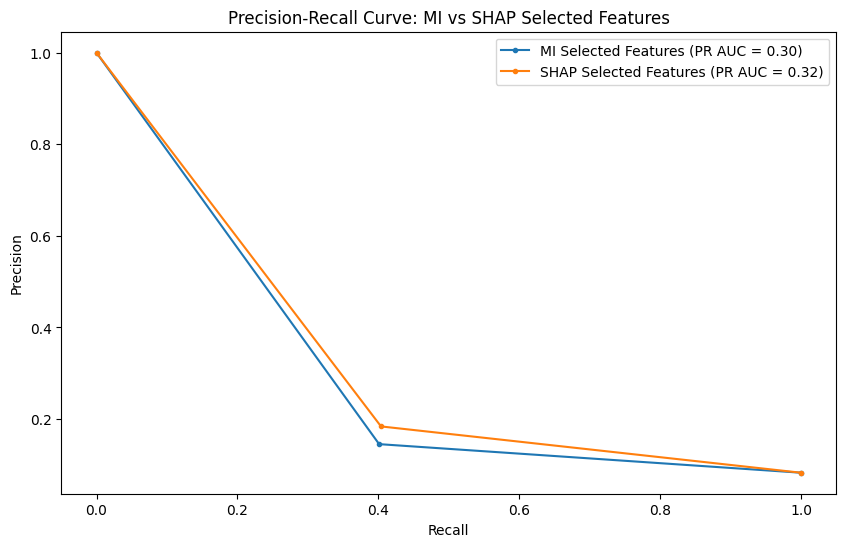

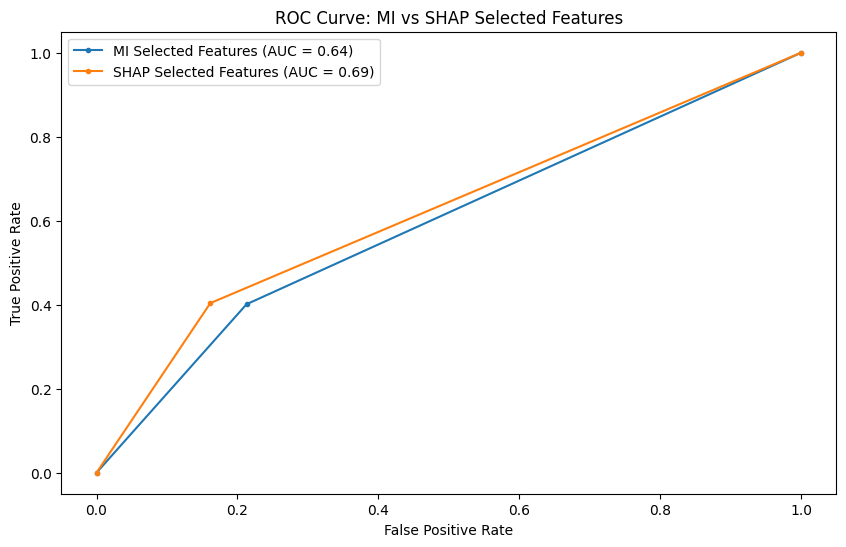

In [ ]:
# Step 15: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_pred_mi_optimal)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_pred_shap_optimal)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_pred_mi_optimal)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_pred_shap_optimal)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi_best:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap_best:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

*E2 Random Forest*

In [ ]:
# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE and Train Stacking Classifier for SHAP and MI selected features
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)

In [ ]:
# Step 2: Define Parameter Grid for Randomized Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 20}, {0: 1, 1: 50}]  # Emphasize minority class more
}

In [ ]:
# Use RandomizedSearchCV
random_search_shap = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduced cross-validation folds
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV on SHAP-selected features
random_search_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

best_params_shap = random_search_shap.best_params_
best_model_shap = random_search_shap.best_estimator_

In [ ]:
print("Best parameters for SHAP-selected features:")
print(best_params_shap)
print(f"Best ROC AUC score for SHAP-selected features: {random_search_shap.best_score_:.4f}")

Best parameters for SHAP-selected features:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': {0: 1, 1: 10}}
Best ROC AUC score for SHAP-selected features: 0.9795


In [ ]:
# Randomized Search on MI-Selected Features
random_search_mi = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduced cross-validation folds for speed
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV on MI-selected features
random_search_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

best_params_mi = random_search_mi.best_params_
best_model_mi = random_search_mi.best_estimator_

print("Best parameters for MI-selected features:")
print(best_params_mi)
print(f"Best ROC AUC score for MI-selected features: {random_search_mi.best_score_:.4f}")

Best parameters for MI-selected features:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': {0: 1, 1: 10}}
Best ROC AUC score for MI-selected features: 0.9805


In [ ]:
# Step 11: Evaluate the Best SHAP Model
X_test_shap = X_test[selected_features_shap]
y_prob_shap_best = best_model_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap_best = best_model_shap.predict(X_test_shap)

accuracy_shap_best = roc_auc_score(y_test, y_prob_shap_best)
print(f"Best SHAP Model ROC AUC: {accuracy_shap_best:.4f}")
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_best))

# Step 12: Evaluate the Best MI Model
X_test_mi = X_test[selected_features_mi]
y_prob_mi_best = best_model_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi_best = best_model_mi.predict(X_test_mi)

accuracy_mi_best = roc_auc_score(y_test, y_prob_mi_best)
print(f"Best MI Model ROC AUC: {accuracy_mi_best:.4f}")
print("Classification Report for MI-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_best))

# Step 13: Comparison of Models
print("\nComparison of Model Performance:")
print(f"SHAP-Selected Features Model ROC AUC: {accuracy_shap_best:.4f}")
print(f"MI-Selected Features Model ROC AUC: {accuracy_mi_best:.4f}")

Best SHAP Model ROC AUC: 0.6850
Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     20894
         1.0       0.30      0.13      0.18      1882

    accuracy                           0.90     22776
   macro avg       0.61      0.55      0.57     22776
weighted avg       0.87      0.90      0.89     22776

Best MI Model ROC AUC: 0.6788
Classification Report for MI-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     20894
         1.0       0.43      0.12      0.19      1882

    accuracy                           0.91     22776
   macro avg       0.68      0.55      0.57     22776
weighted avg       0.88      0.91      0.89     22776


Comparison of Model Performance:
SHAP-Selected Features Model ROC AUC: 0.6850
MI-Selected Features Model ROC AUC: 0.6788


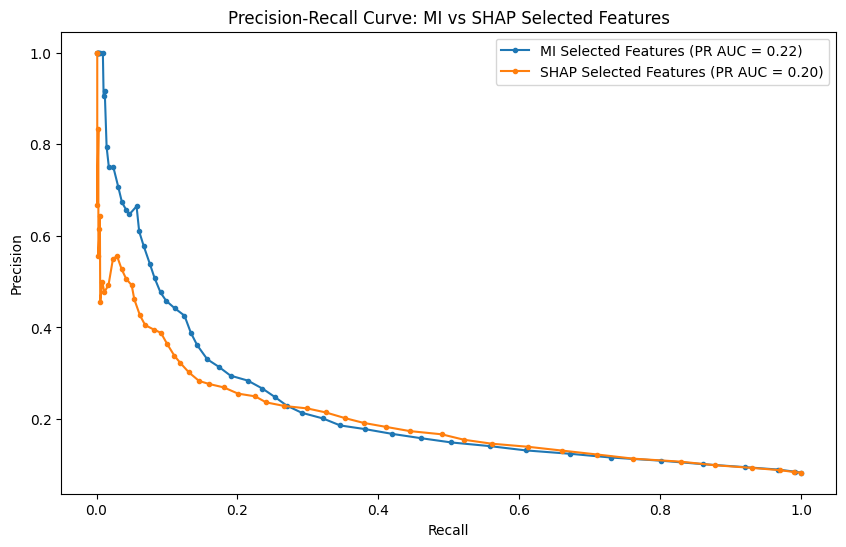

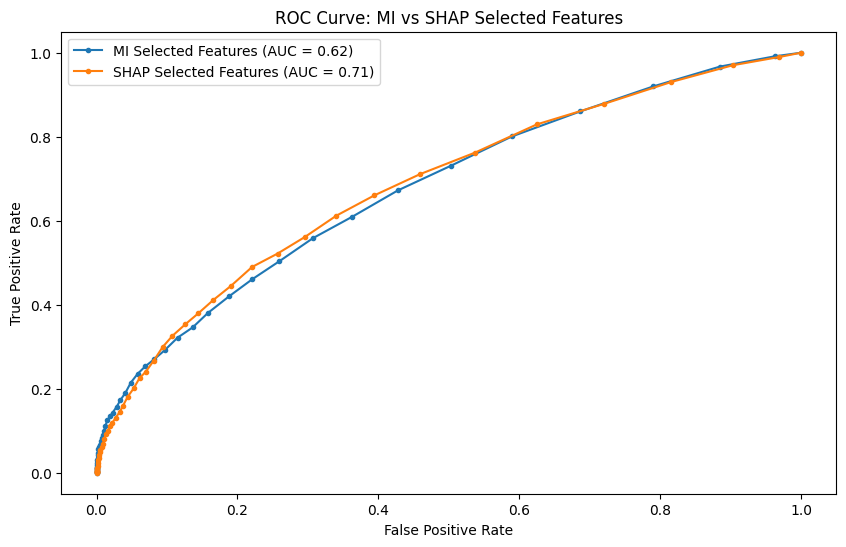

In [ ]:
# Step 7: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi_best)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap_best)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi_best)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

In [ ]:
# Step 1: Adjust the decision threshold
y_prob_shap = best_model_shap.predict_proba(X_test_shap)[:, 1]
y_prob_mi = best_model_mi.predict_proba(X_test_mi)[:, 1]

# Step 2: Calculate Precision-Recall Curve
precision_shap, recall_shap, thresholds_shap = precision_recall_curve(y_test, y_prob_shap)
precision_mi, recall_mi, thresholds_mi = precision_recall_curve(y_test, y_prob_mi)

In [ ]:
# Step 3: Find the optimal threshold using F1 score (or other metrics)
# Prevent divide-by-zero issues in F1 score calculation
with np.errstate(divide='ignore', invalid='ignore'):
    fscore_shap = np.where((precision_shap + recall_shap) == 0, 0, 2 * (precision_shap * recall_shap) / (precision_shap + recall_shap))
    fscore_mi = np.where((precision_mi + recall_mi) == 0, 0, 2 * (precision_mi * recall_mi) / (precision_mi + recall_mi))

# Step 4: Get the threshold that maximizes the F1 score
optimal_idx_shap = np.argmax(fscore_shap)
optimal_threshold_shap = thresholds_shap[optimal_idx_shap]

optimal_idx_mi = np.argmax(fscore_mi)
optimal_threshold_mi = thresholds_mi[optimal_idx_mi]

print(f"Optimal Threshold for SHAP Model: {optimal_threshold_shap}")
print(f"Optimal Threshold for MI Model: {optimal_threshold_mi}")

# Step 5: Apply the new threshold to get predictions
y_pred_shap_optimal = (y_prob_shap >= optimal_threshold_shap).astype(int)
y_pred_mi_optimal = (y_prob_mi >= optimal_threshold_mi).astype(int)

Optimal Threshold for SHAP Model: 0.34
Optimal Threshold for MI Model: 0.36


In [ ]:
# Step 6: Evaluate the models with the new threshold
accuracy_shap_best = accuracy_score(y_test, y_pred_shap_optimal)
auc_shap_best = roc_auc_score(y_test, y_prob_shap)
print(f"Best SHAP Model Accuracy: {accuracy_shap_best:.4f}")
print(f"Best SHAP Model AUC: {auc_shap_best:.4f}")
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_optimal))

accuracy_mi_best = accuracy_score(y_test, y_pred_mi_optimal)
auc_mi_best = roc_auc_score(y_test, y_prob_mi)
print(f"Best MI Model Accuracy: {accuracy_mi_best:.4f}")
print(f"Best MI Model AUC: {auc_mi_best:.4f}")
print("Classification Report for MI-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_optimal))

Best SHAP Model Accuracy: 0.8455
Best SHAP Model AUC: 0.6850
Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91     20894
         1.0       0.21      0.33      0.26      1882

    accuracy                           0.85     22776
   macro avg       0.58      0.61      0.59     22776
weighted avg       0.88      0.85      0.86     22776

Best MI Model Accuracy: 0.8750
Best MI Model AUC: 0.6788
Classification Report for MI-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     20894
         1.0       0.25      0.25      0.25      1882

    accuracy                           0.88     22776
   macro avg       0.59      0.59      0.59     22776
weighted avg       0.88      0.88      0.88     22776



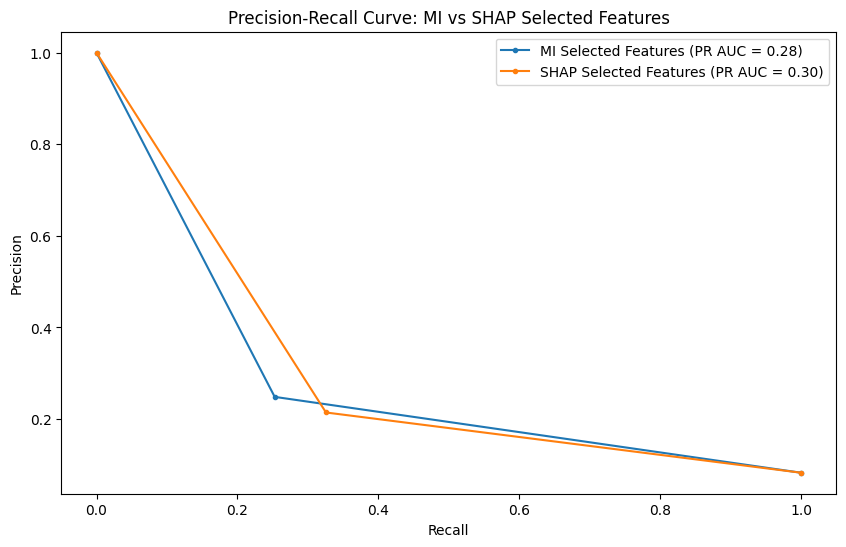

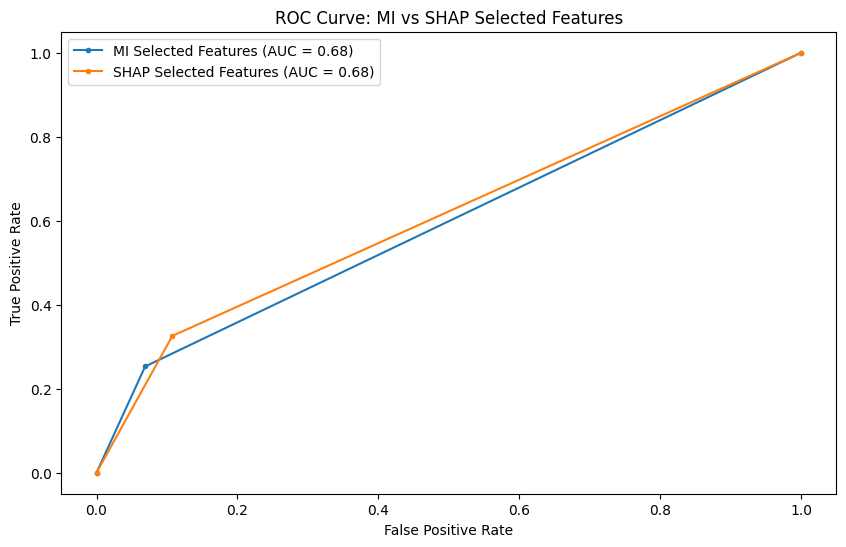

In [ ]:
# Step 9: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_pred_mi_optimal)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_pred_shap_optimal)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_pred_mi_optimal)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_pred_shap_optimal)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi_best:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap_best:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

*E2 XGBoost*

In [ ]:
# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE and Train XGBoost for SHAP and MI selected features
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)


In [ ]:
# Step 2: Define Parameter Grid for Randomized Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10, 50, 100]  # Emphasize minority class more
}

In [ ]:
# Step 3: Use RandomizedSearchCV for SHAP-selected features
random_search_shap = RandomizedSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduced cross-validation folds for speed
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Step 4: Fit the RandomizedSearchCV on SHAP-selected features
random_search_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

best_params_shap = random_search_shap.best_params_
best_model_shap = random_search_shap.best_estimator_

print("Best parameters for SHAP-selected features:")
print(best_params_shap)
print(f"Best ROC AUC score for SHAP-selected features: {random_search_shap.best_score_:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:35:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for SHAP-selected features:
{'subsample': 0.8, 'scale_pos_weight': 100, 'n_estimators': 150, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best ROC AUC score for SHAP-selected features: 0.9789


In [ ]:
# Step 5: Use RandomizedSearchCV for MI-selected features
random_search_mi = RandomizedSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduced cross-validation folds for speed
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Step 6: Fit the RandomizedSearchCV on MI-selected features
random_search_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

best_params_mi = random_search_mi.best_params_
best_model_mi = random_search_mi.best_estimator_

print("Best parameters for MI-selected features:")
print(best_params_mi)
print(f"Best ROC AUC score for MI-selected features: {random_search_mi.best_score_:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:36:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for MI-selected features:
{'subsample': 0.8, 'scale_pos_weight': 100, 'n_estimators': 150, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best ROC AUC score for MI-selected features: 0.9699


In [ ]:
# Step 7: Evaluate the Best SHAP Model
X_test_shap = X_test[selected_features_shap]
y_prob_shap_best = best_model_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap_best = (y_prob_shap_best >= 0.5).astype(int)

roc_auc_shap_best = roc_auc_score(y_test, y_prob_shap_best)
print(f"Best SHAP Model ROC AUC: {roc_auc_shap_best:.4f}")
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_best))

Best SHAP Model ROC AUC: 0.7003
Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     20894
         1.0       0.16      0.58      0.25      1882

    accuracy                           0.71     22776
   macro avg       0.55      0.65      0.53     22776
weighted avg       0.88      0.71      0.77     22776



In [ ]:
# Step 8: Evaluate the Best MI Model
X_test_mi = X_test[selected_features_mi]
y_prob_mi_best = best_model_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi_best = (y_prob_mi_best >= 0.5).astype(int)

roc_auc_mi_best = roc_auc_score(y_test, y_prob_mi_best)
print(f"Best MI Model ROC AUC: {roc_auc_mi_best:.4f}")
print("Classification Report for MI-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_best))

Best MI Model ROC AUC: 0.6379
Classification Report for MI-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.56      0.71     20894
         1.0       0.12      0.63      0.20      1882

    accuracy                           0.57     22776
   macro avg       0.53      0.60      0.45     22776
weighted avg       0.88      0.57      0.66     22776



In [ ]:
# Comparison of Models
print("\nComparison of Model Performance:")
print(f"SHAP-Selected Features Model ROC AUC: {roc_auc_shap_best:.4f}")
print(f"MI-Selected Features Model ROC AUC: {roc_auc_mi_best:.4f}")


Comparison of Model Performance:
SHAP-Selected Features Model ROC AUC: 0.7003
MI-Selected Features Model ROC AUC: 0.6379


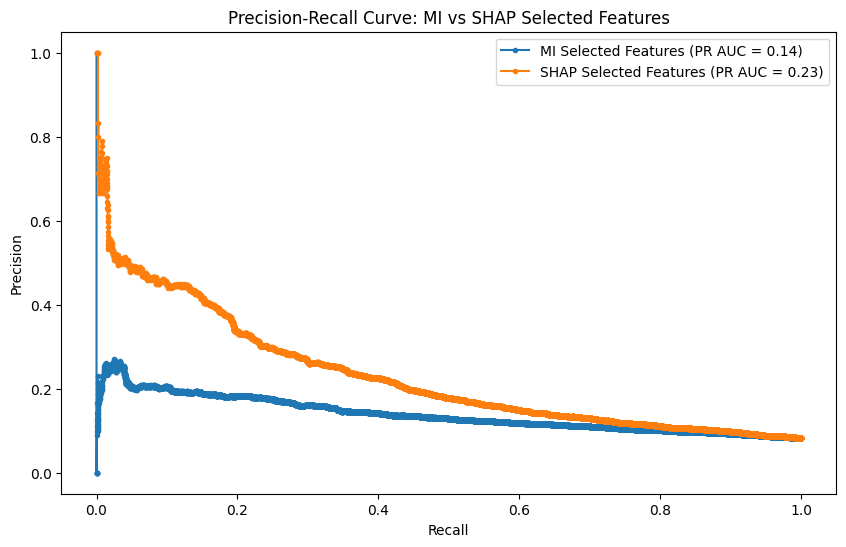

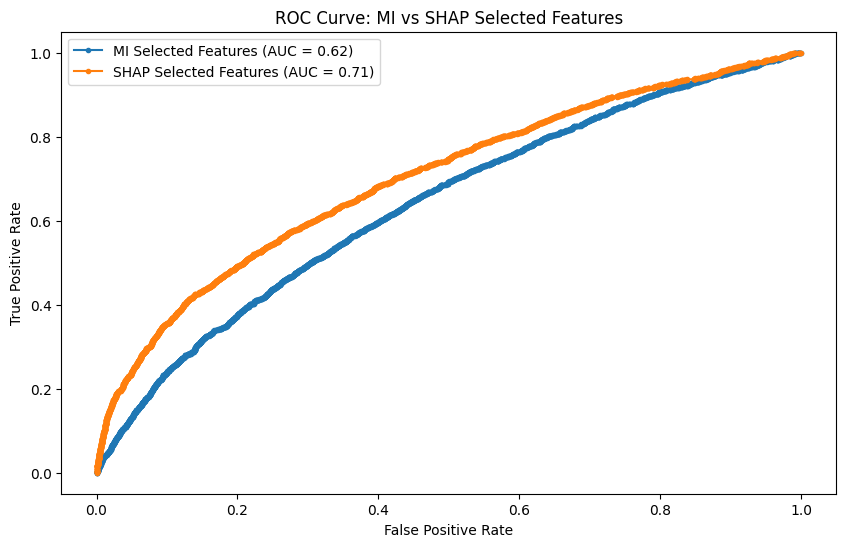

In [ ]:
# Step 9: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi_best)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap_best)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi_best)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

In [ ]:
# Step 10: Adjust the decision threshold
y_prob_shap = best_model_shap.predict_proba(X_test_shap)[:, 1]
y_prob_mi = best_model_mi.predict_proba(X_test_mi)[:, 1]

# Step 12: Calculate Precision-Recall Curve
precision_shap, recall_shap, thresholds_shap = precision_recall_curve(y_test, y_prob_shap)
precision_mi, recall_mi, thresholds_mi = precision_recall_curve(y_test, y_prob_mi)

In [ ]:
# Step 13: Find the optimal threshold using F1 score (or other metrics)
# Prevent divide-by-zero issues in F1 score calculation
with np.errstate(divide='ignore', invalid='ignore'):
    fscore_shap = np.where((precision_shap + recall_shap) == 0, 0, 2 * (precision_shap * recall_shap) / (precision_shap + recall_shap))
    fscore_mi = np.where((precision_mi + recall_mi) == 0, 0, 2 * (precision_mi * recall_mi) / (precision_mi + recall_mi))

# Step 14: Get the threshold that maximizes the F1 score
optimal_idx_shap = np.argmax(fscore_shap)
optimal_threshold_shap = thresholds_shap[optimal_idx_shap]

optimal_idx_mi = np.argmax(fscore_mi)
optimal_threshold_mi = thresholds_mi[optimal_idx_mi]

print(f"Optimal Threshold for SHAP Model: {optimal_threshold_shap}")
print(f"Optimal Threshold for MI Model: {optimal_threshold_mi}")

# Step 15: Apply the new threshold to get predictions
y_pred_shap_optimal = (y_prob_shap >= optimal_threshold_shap).astype(int)
y_pred_mi_optimal = (y_prob_mi >= optimal_threshold_mi).astype(int)

Optimal Threshold for SHAP Model: 0.8532803654670715
Optimal Threshold for MI Model: 0.90576171875


In [ ]:
# Step 16: Evaluate the models with the new threshold
accuracy_shap_best = accuracy_score(y_test, y_pred_shap_optimal)
auc_shap_best = roc_auc_score(y_test, y_prob_shap)
print(f"Best SHAP Model Accuracy: {accuracy_shap_best:.4f}")
print(f"Best SHAP Model AUC: {auc_shap_best:.4f}")
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_optimal))

accuracy_mi_best = accuracy_score(y_test, y_pred_mi_optimal)
auc_mi_best = roc_auc_score(y_test, y_prob_mi)
print(f"Best MI Model Accuracy: {accuracy_mi_best:.4f}")
print(f"Best MI Model AUC: {auc_mi_best:.4f}")
print("Classification Report for MI-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_optimal))

Best SHAP Model Accuracy: 0.8601
Best SHAP Model AUC: 0.7003
Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     20894
         1.0       0.25      0.35      0.29      1882

    accuracy                           0.86     22776
   macro avg       0.59      0.63      0.61     22776
weighted avg       0.88      0.86      0.87     22776

Best MI Model Accuracy: 0.8024
Best MI Model AUC: 0.6379
Classification Report for MI-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     20894
         1.0       0.16      0.32      0.21      1882

    accuracy                           0.80     22776
   macro avg       0.55      0.58      0.55     22776
weighted avg       0.87      0.80      0.83     22776



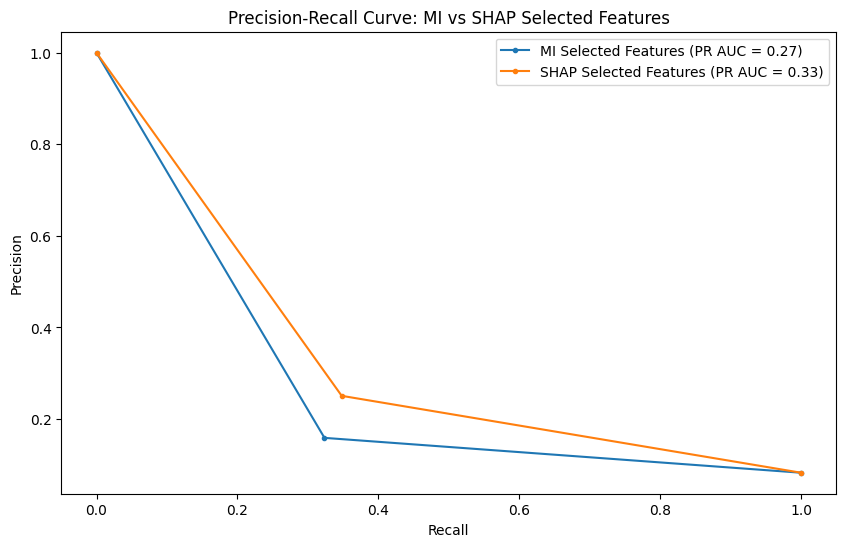

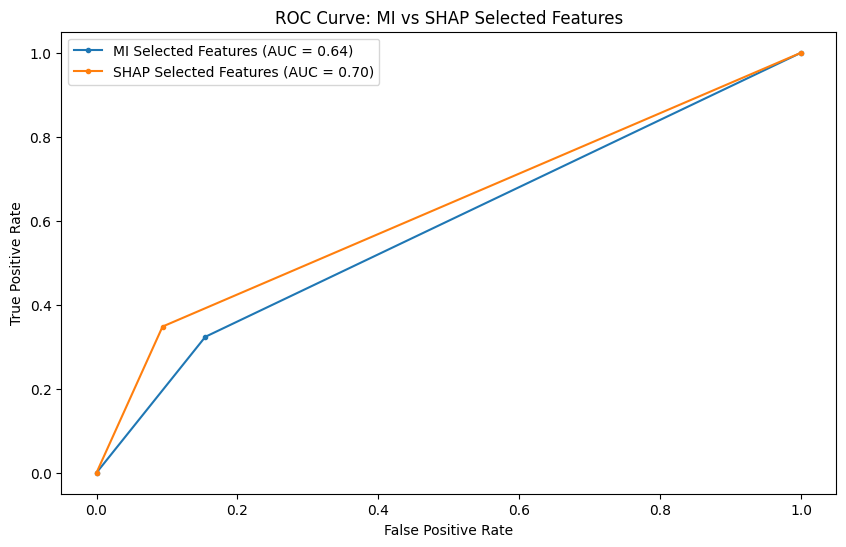

In [ ]:
# Step 17: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_pred_mi_optimal)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_pred_shap_optimal)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_pred_mi_optimal)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_pred_shap_optimal)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi_best:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap_best:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

*E2 Stacked Classifier*

In [ ]:
# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE and Train Stacking Classifier for SHAP and MI selected features
X_train_mi_resampled, y_train_mi_resampled = smote.fit_resample(X_train_mi, y_train)
X_train_shap_resampled, y_train_shap_resampled = smote.fit_resample(X_train_shap, y_train)

In [ ]:
# Step 2: Define base models for stacking
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

In [ ]:
# Step 3: Define the stacking classifier
stacked_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3, n_jobs=-1)


In [ ]:
# Step 4: Define parameter grid for Randomized Search
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [3, 6, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__gamma': [0, 0.1, 0.5],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__scale_pos_weight': [1, 10, 50, 100]  # Emphasize minority class more
}


In [ ]:
# Step 5: RandomizedSearchCV for SHAP-selected features
random_search_shap = RandomizedSearchCV(
    stacked_clf,
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduced cross-validation folds for speed
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV on SHAP-selected features
random_search_shap.fit(X_train_shap_resampled, y_train_shap_resampled)

best_params_shap = random_search_shap.best_params_
best_model_shap = random_search_shap.best_estimator_

print("Best parameters for SHAP-selected features:")
print(best_params_shap)
print(f"Best ROC AUC score for SHAP-selected features: {random_search_shap.best_score_:.4f}")


Best parameters for SHAP-selected features:
{'xgb__subsample': 0.8, 'xgb__scale_pos_weight': 50, 'xgb__min_child_weight': 10, 'xgb__max_depth': 10, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0, 'xgb__colsample_bytree': 1.0, 'rf__n_estimators': 50, 'rf__max_depth': 3}
Best ROC AUC score for SHAP-selected features: 0.9595


In [ ]:
# Step 6: RandomizedSearchCV for MI-selected features
random_search_mi = RandomizedSearchCV(
    stacked_clf,
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduced cross-validation folds for speed
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV on MI-selected features
random_search_mi.fit(X_train_mi_resampled, y_train_mi_resampled)

best_params_mi = random_search_mi.best_params_
best_model_mi = random_search_mi.best_estimator_

print("Best parameters for MI-selected features:")
print(best_params_mi)
print(f"Best ROC AUC score for MI-selected features: {random_search_mi.best_score_:.4f}")

Best parameters for MI-selected features:
{'xgb__subsample': 0.8, 'xgb__scale_pos_weight': 10, 'xgb__min_child_weight': 5, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.8, 'rf__n_estimators': 100, 'rf__max_depth': 6}
Best ROC AUC score for MI-selected features: 0.9414


In [ ]:
# Step 7: Evaluate the Best SHAP Model
X_test_shap = X_test[selected_features_shap]
y_prob_shap_best = best_model_shap.predict_proba(X_test_shap)[:, 1]
y_pred_shap_best = (y_prob_shap_best >= 0.5).astype(int)

roc_auc_shap_best = roc_auc_score(y_test, y_prob_shap_best)
print(f"Best SHAP Model ROC AUC: {roc_auc_shap_best:.4f}")
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_best))

Best SHAP Model ROC AUC: 0.7064
Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88     20894
         1.0       0.19      0.46      0.27      1882

    accuracy                           0.79     22776
   macro avg       0.57      0.64      0.57     22776
weighted avg       0.88      0.79      0.83     22776



In [ ]:
# Step 8: Evaluate the Best MI Model
X_test_mi = X_test[selected_features_mi]
y_prob_mi_best = best_model_mi.predict_proba(X_test_mi)[:, 1]
y_pred_mi_best = (y_prob_mi_best >= 0.5).astype(int)

roc_auc_mi_best = roc_auc_score(y_test, y_prob_mi_best)
print(f"Best MI Model ROC AUC: {roc_auc_mi_best:.4f}")
print("Classification Report for MI-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_best))

Best MI Model ROC AUC: 0.6237
Classification Report for MI-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     20894
         1.0       0.14      0.27      0.19      1882

    accuracy                           0.80     22776
   macro avg       0.53      0.56      0.54     22776
weighted avg       0.86      0.80      0.83     22776



In [ ]:
# Step 9: Comparison of Models
print("\nComparison of Model Performance:")
print(f"SHAP-Selected Features Model ROC AUC: {roc_auc_shap_best:.4f}")
print(f"MI-Selected Features Model ROC AUC: {roc_auc_mi_best:.4f}")


Comparison of Model Performance:
SHAP-Selected Features Model ROC AUC: 0.7064
MI-Selected Features Model ROC AUC: 0.6237


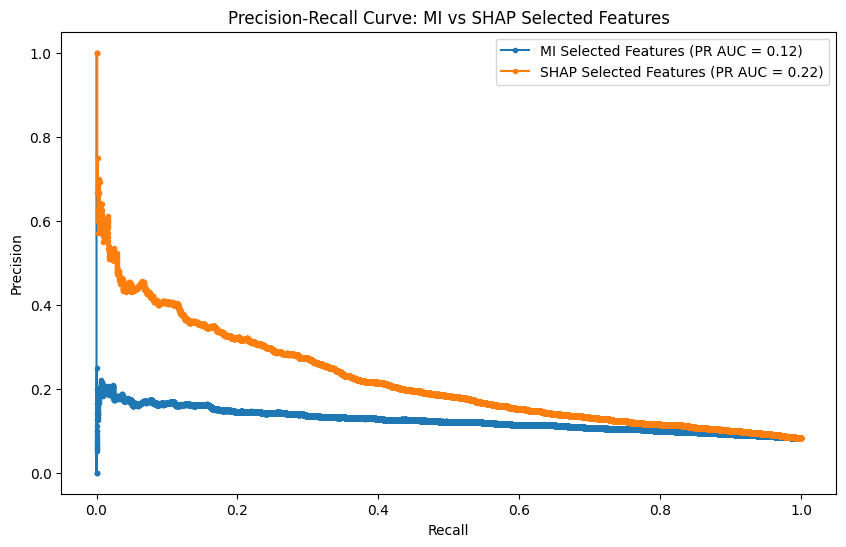

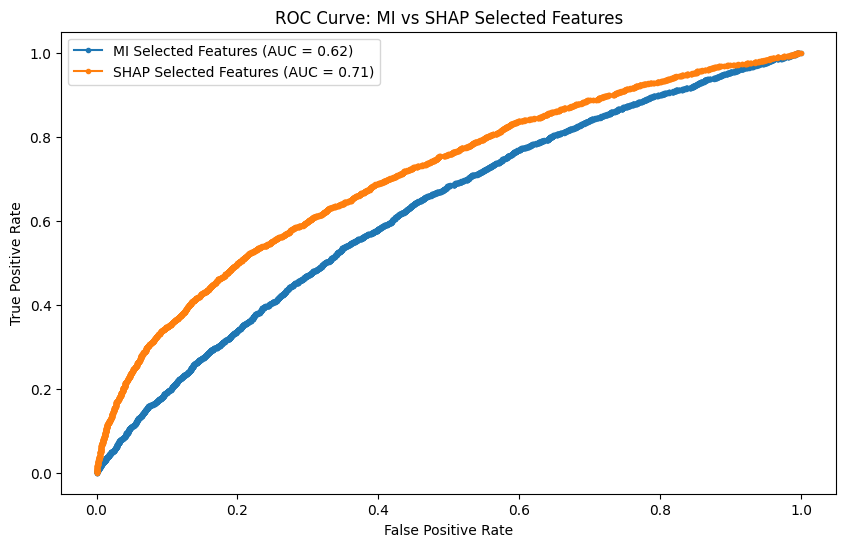

In [ ]:
# Step 10: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_prob_mi_best)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_prob_shap_best)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_prob_mi_best)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_prob_shap_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

In [ ]:
# Step 11: Adjust the decision threshold
y_prob_shap = best_model_shap.predict_proba(X_test_shap)[:, 1]
y_prob_mi = best_model_mi.predict_proba(X_test_mi)[:, 1]

# Step 12: Calculate Precision-Recall Curve
precision_shap, recall_shap, thresholds_shap = precision_recall_curve(y_test, y_prob_shap)
precision_mi, recall_mi, thresholds_mi = precision_recall_curve(y_test, y_prob_mi)

In [ ]:
# Step 13: Find the optimal threshold using F1 score (or other metrics)
# Prevent divide-by-zero issues in F1 score calculation
with np.errstate(divide='ignore', invalid='ignore'):
    fscore_shap = np.where((precision_shap + recall_shap) == 0, 0, 2 * (precision_shap * recall_shap) / (precision_shap + recall_shap))
    fscore_mi = np.where((precision_mi + recall_mi) == 0, 0, 2 * (precision_mi * recall_mi) / (precision_mi + recall_mi))

# Step 14: Get the threshold that maximizes the F1 score
optimal_idx_shap = np.argmax(fscore_shap)
optimal_threshold_shap = thresholds_shap[optimal_idx_shap]

optimal_idx_mi = np.argmax(fscore_mi)
optimal_threshold_mi = thresholds_mi[optimal_idx_mi]

print(f"Optimal Threshold for SHAP Model: {optimal_threshold_shap}")
print(f"Optimal Threshold for MI Model: {optimal_threshold_mi}")

# Step 15: Apply the new threshold to get predictions
y_pred_shap_optimal = (y_prob_shap >= optimal_threshold_shap).astype(int)
y_pred_mi_optimal = (y_prob_mi >= optimal_threshold_mi).astype(int)

Optimal Threshold for SHAP Model: 0.7507275209446495
Optimal Threshold for MI Model: 0.24123314632603443


In [ ]:
# Step 16: Evaluate the models with the new threshold
accuracy_shap_best = accuracy_score(y_test, y_pred_shap_optimal)
auc_shap_best = roc_auc_score(y_test, y_prob_shap)
print(f"Best SHAP Model Accuracy: {accuracy_shap_best:.4f}")
print(f"Best SHAP Model AUC: {auc_shap_best:.4f}")
print("Classification Report for SHAP-Selected Features Model:")
print(classification_report(y_test, y_pred_shap_optimal))

accuracy_mi_best = accuracy_score(y_test, y_pred_mi_optimal)
auc_mi_best = roc_auc_score(y_test, y_prob_mi)
print(f"Best MI Model Accuracy: {accuracy_mi_best:.4f}")
print(f"Best MI Model AUC: {auc_mi_best:.4f}")
print("Classification Report for MI-Selected Features Model:")
print(classification_report(y_test, y_pred_mi_optimal))

Best SHAP Model Accuracy: 0.8742
Best SHAP Model AUC: 0.7064
Classification Report for SHAP-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     20894
         1.0       0.27      0.31      0.29      1882

    accuracy                           0.87     22776
   macro avg       0.60      0.62      0.61     22776
weighted avg       0.88      0.87      0.88     22776

Best MI Model Accuracy: 0.6410
Best MI Model AUC: 0.6237
Classification Report for MI-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     20894
         1.0       0.12      0.54      0.20      1882

    accuracy                           0.64     22776
   macro avg       0.53      0.59      0.48     22776
weighted avg       0.87      0.64      0.72     22776



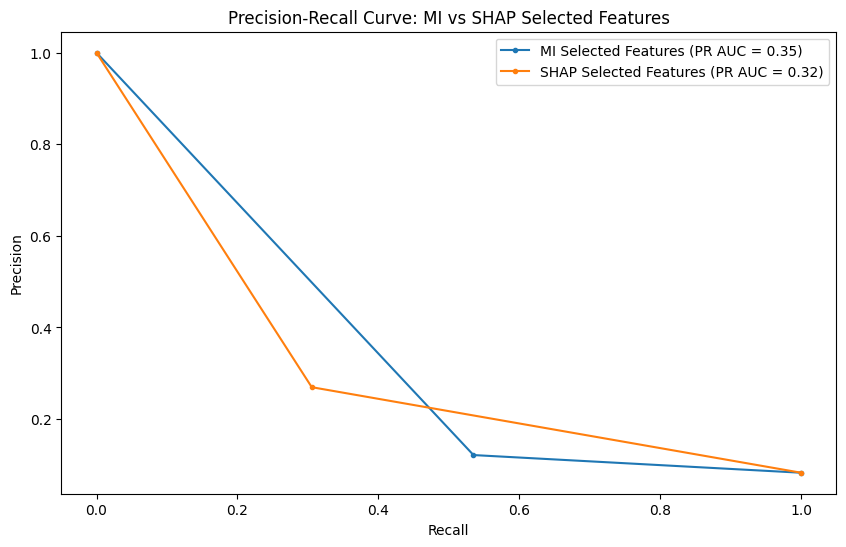

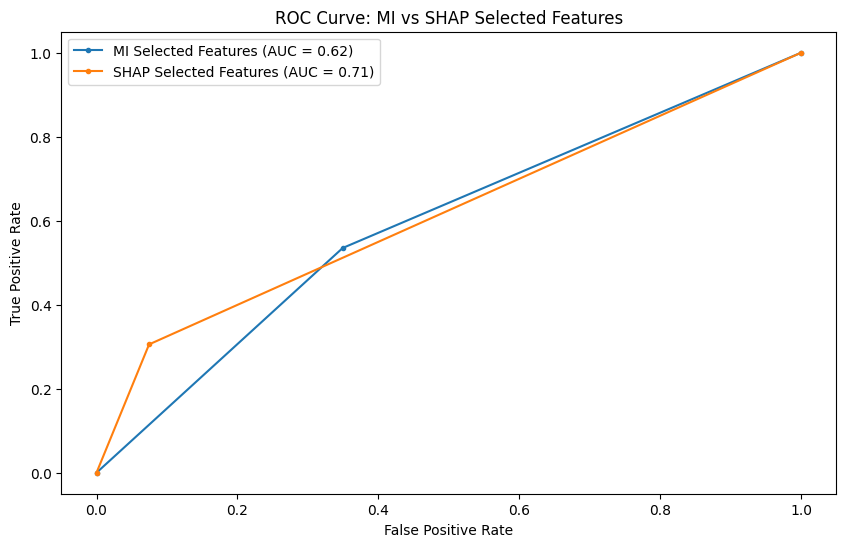

In [ ]:
# Step 17: Plot Precision-Recall Curve and ROC Curve for both models

# Precision-Recall Curve
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_pred_mi_optimal)
precision_shap, recall_shap, _ = precision_recall_curve(y_test, y_pred_shap_optimal)

# Calculate the PR AUC for both models
from sklearn.metrics import auc
pr_auc_mi = auc(recall_mi, precision_mi)
pr_auc_shap = auc(recall_shap, precision_shap)

plt.figure(figsize=(10, 6))
plt.plot(recall_mi, precision_mi, marker='.', label=f'MI Selected Features (PR AUC = {pr_auc_mi:.2f})')
plt.plot(recall_shap, precision_shap, marker='.', label=f'SHAP Selected Features (PR AUC = {pr_auc_shap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

# ROC Curve
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_pred_mi_optimal)
fpr_shap, tpr_shap, _ = roc_curve(y_test, y_pred_shap_optimal)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, marker='.', label=f'MI Selected Features (AUC = {auc_mi_best:.2f})')
plt.plot(fpr_shap, tpr_shap, marker='.', label=f'SHAP Selected Features (AUC = {auc_shap_best:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features')
plt.legend()
plt.show()

#Experiment 3

*E3 Logistic Regression*

In [ ]:
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Step 1: Initialize SMOTE-Tomek and SMOTE-ENN
smote_tomek = SMOTETomek(random_state=42)
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE-Tomek for SHAP and MI selected features
X_train_mi_resampled_tomek, y_train_mi_resampled_tomek = smote_tomek.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_tomek, y_train_shap_resampled_tomek = smote_tomek.fit_resample(X_train_shap, y_train)

# Apply SMOTE-ENN for SHAP and MI selected features
X_train_mi_resampled_enn, y_train_mi_resampled_enn = smote_enn.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_enn, y_train_shap_resampled_enn = smote_enn.fit_resample(X_train_shap, y_train)

# Step 2: Define the parameter grid for Logistic Regression
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['liblinear', 'saga'],
     'penalty': ['l1', 'l2'],
     'max_iter': [100, 200, 500, 1000],
     'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}]},
    {'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['newton-cg'],
     'penalty': ['l2'],
     'max_iter': [100, 200, 500, 1000],
     'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}]}
]

# Step 3: Randomized Search Function
def perform_random_search(X_train_resampled, y_train_resampled, X_test, selected_features, model_name):
    log_reg = LogisticRegression(random_state=42)

    random_search = RandomizedSearchCV(
        log_reg,
        param_distributions=param_grid,
        n_iter=20,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train_resampled[selected_features], y_train_resampled)
    best_model = random_search.best_estimator_

    # Predict probabilities and evaluate
    y_prob = best_model.predict_proba(X_test[selected_features])[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"\nBest {model_name} Model AUC: {auc_score:.4f}")
    print(f"Classification Report for {model_name}-Selected Features Model:")
    print(classification_report(y_test, y_pred))

    return best_model, y_prob


In [ ]:
# Step 4: Perform Randomized Search and Evaluate Models
# SMOTE-Tomek Models
best_model_shap_tomek, y_prob_shap_tomek = perform_random_search(X_train_shap_resampled_tomek, y_train_shap_resampled_tomek, X_test, selected_features_shap, "SHAP (SMOTE Tomek)")
best_model_mi_tomek, y_prob_mi_tomek = perform_random_search(X_train_mi_resampled_tomek, y_train_mi_resampled_tomek, X_test, selected_features_mi, "MI (SMOTE Tomek)")

# SMOTE-ENN Models
best_model_shap_enn, y_prob_shap_enn = perform_random_search(X_train_shap_resampled_enn, y_train_shap_resampled_enn, X_test, selected_features_shap, "SHAP (SMOTE ENN)")
best_model_mi_enn, y_prob_mi_enn = perform_random_search(X_train_mi_resampled_enn, y_train_mi_resampled_enn, X_test, selected_features_mi, "MI (SMOTE ENN)")



Best SHAP (SMOTE Tomek) Model AUC: 0.6857
Classification Report for SHAP (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.96      0.06      0.12     20894
         1.0       0.09      0.97      0.16      1882

    accuracy                           0.14     22776
   macro avg       0.52      0.52      0.14     22776
weighted avg       0.89      0.14      0.12     22776


Best MI (SMOTE Tomek) Model AUC: 0.6371
Classification Report for MI (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.96      0.23      0.37     20894
         1.0       0.09      0.89      0.17      1882

    accuracy                           0.28     22776
   macro avg       0.53      0.56      0.27     22776
weighted avg       0.89      0.28      0.35     22776


Best SHAP (SMOTE ENN) Model AUC: 0.6790
Classification Report for SHAP (SMOTE ENN)-Selected Features Model:
              p

In [ ]:
# Step 5: Calculate Precision-Recall Curves and Optimal Thresholds
def calculate_optimal_threshold(precision, recall, thresholds):
    fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))
    optimal_idx = np.argmax(fscore)
    return thresholds[optimal_idx]

# Calculate PR Curves and Optimal Thresholds
precision_shap_tomek, recall_shap_tomek, thresholds_shap_tomek = precision_recall_curve(y_test, y_prob_shap_tomek)
optimal_threshold_shap_tomek = calculate_optimal_threshold(precision_shap_tomek, recall_shap_tomek, thresholds_shap_tomek)

precision_mi_tomek, recall_mi_tomek, thresholds_mi_tomek = precision_recall_curve(y_test, y_prob_mi_tomek)
optimal_threshold_mi_tomek = calculate_optimal_threshold(precision_mi_tomek, recall_mi_tomek, thresholds_mi_tomek)

precision_shap_enn, recall_shap_enn, thresholds_shap_enn = precision_recall_curve(y_test, y_prob_shap_enn)
optimal_threshold_shap_enn = calculate_optimal_threshold(precision_shap_enn, recall_shap_enn, thresholds_shap_enn)

precision_mi_enn, recall_mi_enn, thresholds_mi_enn = precision_recall_curve(y_test, y_prob_mi_enn)
optimal_threshold_mi_enn = calculate_optimal_threshold(precision_mi_enn, recall_mi_enn, thresholds_mi_enn)

print(f"\nOptimal Threshold for SHAP Model (SMOTE Tomek): {optimal_threshold_shap_tomek:.4f}")
print(f"Optimal Threshold for MI Model (SMOTE Tomek): {optimal_threshold_mi_tomek:.4f}")
print(f"Optimal Threshold for SHAP Model (SMOTE ENN): {optimal_threshold_shap_enn:.4f}")
print(f"Optimal Threshold for MI Model (SMOTE ENN): {optimal_threshold_mi_enn:.4f}")



Optimal Threshold for SHAP Model (SMOTE Tomek): 0.8873
Optimal Threshold for MI Model (SMOTE Tomek): 0.7526
Optimal Threshold for SHAP Model (SMOTE ENN): 0.8859
Optimal Threshold for MI Model (SMOTE ENN): 0.6490


<ipython-input-27-8eeb5f0d69af>:3: RuntimeWarning: invalid value encountered in divide
  fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))
<ipython-input-27-8eeb5f0d69af>:3: RuntimeWarning: invalid value encountered in divide
  fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))


In [ ]:
# Step 6: Evaluate Models with Optimal Thresholds
def evaluate_with_new_threshold(y_prob, optimal_threshold, model_name):
    y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_optimal)
    auc = roc_auc_score(y_test, y_prob)
    print(f"\n{model_name} with Optimal Threshold - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred_optimal))

evaluate_with_new_threshold(y_prob_shap_tomek, optimal_threshold_shap_tomek, "SHAP Model (SMOTE Tomek)")
evaluate_with_new_threshold(y_prob_mi_tomek, optimal_threshold_mi_tomek, "MI Model (SMOTE Tomek)")
evaluate_with_new_threshold(y_prob_shap_enn, optimal_threshold_shap_enn, "SHAP Model (SMOTE ENN)")
evaluate_with_new_threshold(y_prob_mi_enn, optimal_threshold_mi_enn, "MI Model (SMOTE ENN)")



SHAP Model (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.8019, AUC: 0.6857
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89     20894
         1.0       0.18      0.40      0.25      1882

    accuracy                           0.80     22776
   macro avg       0.56      0.62      0.57     22776
weighted avg       0.88      0.80      0.83     22776


MI Model (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.7816, AUC: 0.6371
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     20894
         1.0       0.15      0.36      0.21      1882

    accuracy                           0.78     22776
   macro avg       0.54      0.59      0.54     22776
weighted avg       0.87      0.78      0.82     22776


SHAP Model (SMOTE ENN) with Optimal Threshold - Accuracy: 0.8370, AUC: 0.6790
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     2089

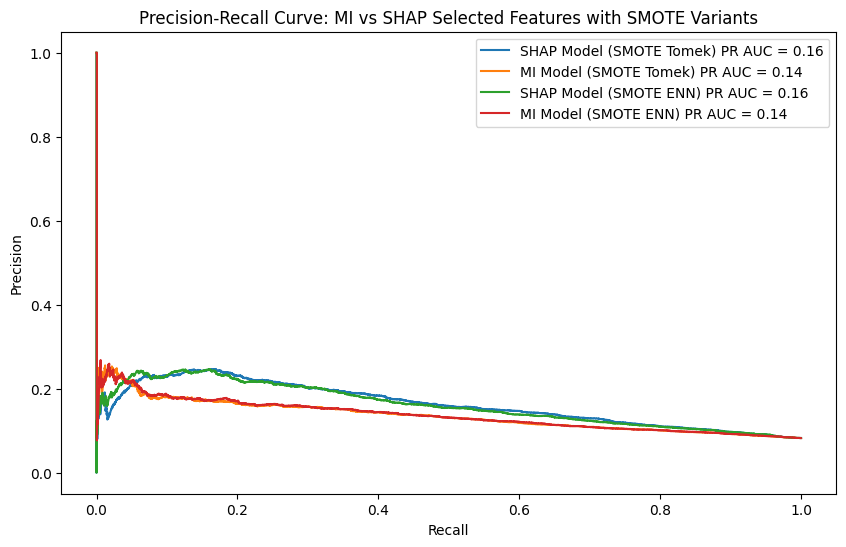

In [ ]:
# Step 7: Plot PR AUC Curves
pr_auc_shap_tomek = auc(recall_shap_tomek, precision_shap_tomek)
pr_auc_mi_tomek = auc(recall_mi_tomek, precision_mi_tomek)
pr_auc_shap_enn = auc(recall_shap_enn, precision_shap_enn)
pr_auc_mi_enn = auc(recall_mi_enn, precision_mi_enn)

plt.figure(figsize=(10, 6))
plt.plot(recall_shap_tomek, precision_shap_tomek, label=f'SHAP Model (SMOTE Tomek) PR AUC = {pr_auc_shap_tomek:.2f}')
plt.plot(recall_mi_tomek, precision_mi_tomek, label=f'MI Model (SMOTE Tomek) PR AUC = {pr_auc_mi_tomek:.2f}')
plt.plot(recall_shap_enn, precision_shap_enn, label=f'SHAP Model (SMOTE ENN) PR AUC = {pr_auc_shap_enn:.2f}')
plt.plot(recall_mi_enn, precision_mi_enn, label=f'MI Model (SMOTE ENN) PR AUC = {pr_auc_mi_enn:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features with SMOTE Variants')
plt.legend()
plt.show()

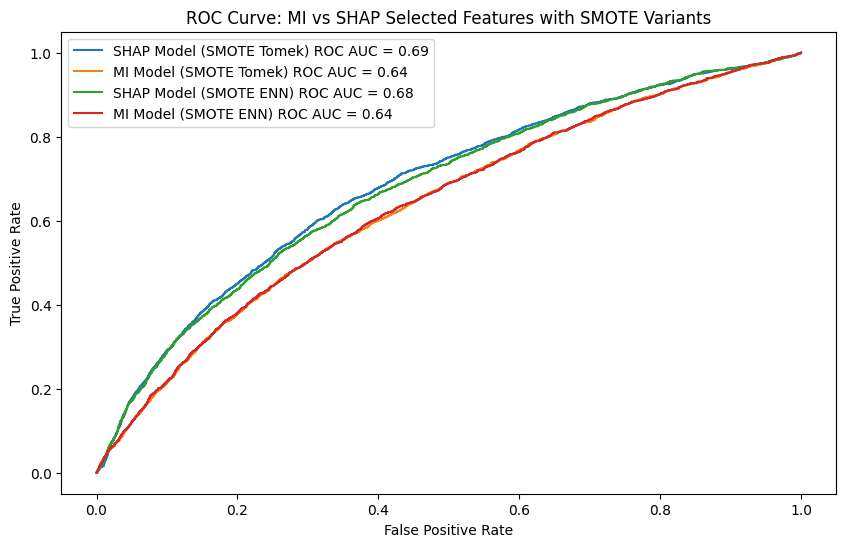

In [ ]:
# Step 8: Plot ROC Curves
fpr_shap_tomek, tpr_shap_tomek, _ = roc_curve(y_test, y_prob_shap_tomek)
fpr_mi_tomek, tpr_mi_tomek, _ = roc_curve(y_test, y_prob_mi_tomek)
fpr_shap_enn, tpr_shap_enn, _ = roc_curve(y_test, y_prob_shap_enn)
fpr_mi_enn, tpr_mi_enn, _ = roc_curve(y_test, y_prob_mi_enn)

roc_auc_shap_tomek = roc_auc_score(y_test, y_prob_shap_tomek)
roc_auc_mi_tomek = roc_auc_score(y_test, y_prob_mi_tomek)
roc_auc_shap_enn = roc_auc_score(y_test, y_prob_shap_enn)
roc_auc_mi_enn = roc_auc_score(y_test, y_prob_mi_enn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_shap_tomek, tpr_shap_tomek, label=f'SHAP Model (SMOTE Tomek) ROC AUC = {roc_auc_shap_tomek:.2f}')
plt.plot(fpr_mi_tomek, tpr_mi_tomek, label=f'MI Model (SMOTE Tomek) ROC AUC = {roc_auc_mi_tomek:.2f}')
plt.plot(fpr_shap_enn, tpr_shap_enn, label=f'SHAP Model (SMOTE ENN) ROC AUC = {roc_auc_shap_enn:.2f}')
plt.plot(fpr_mi_enn, tpr_mi_enn, label=f'MI Model (SMOTE ENN) ROC AUC = {roc_auc_mi_enn:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features with SMOTE Variants')
plt.legend()
plt.show()

*E3 Random Forest*

In [ ]:
# Step 1: Initialize the resampling techniques
smote_tomek = SMOTETomek(random_state=42)
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTETomek and SMOTEENN for SHAP and MI selected features
X_train_mi_resampled_tomek, y_train_mi_resampled_tomek = smote_tomek.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_tomek, y_train_shap_resampled_tomek = smote_tomek.fit_resample(X_train_shap, y_train)

X_train_mi_resampled_enn, y_train_mi_resampled_enn = smote_enn.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_enn, y_train_shap_resampled_enn = smote_enn.fit_resample(X_train_shap, y_train)


In [ ]:
# Step 2: Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', {0: 1, 1: 10}, {0: 1, 1: 20}, {0: 1, 1: 50}]  # Emphasize minority class more
}

In [ ]:
# Step 3: Function to perform RandomizedSearchCV and evaluate model
def perform_random_search(X_train_resampled, y_train_resampled, X_test, selected_features, model_name):
    rf = RandomForestClassifier(random_state=42)

    random_search = RandomizedSearchCV(
        rf,
        param_distributions=param_grid_rf,
        n_iter=10,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train_resampled[selected_features], y_train_resampled)
    best_model = random_search.best_estimator_

    # Predict probabilities and evaluate
    y_prob = best_model.predict_proba(X_test[selected_features])[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\nBest {model_name} Model AUC: {auc:.4f}")
    print(f"Classification Report for {model_name}-Selected Features Model:")
    print(classification_report(y_test, y_pred))

    return best_model, y_prob

In [ ]:
# Step 4: Apply Randomized Search on SHAP and MI-selected features with SMOTE Tomek
print("Using SMOTE Tomek")
best_model_shap_tomek, y_prob_shap_tomek = perform_random_search(X_train_shap_resampled_tomek, y_train_shap_resampled_tomek, X_test, selected_features_shap, "SHAP (SMOTE Tomek)")
best_model_mi_tomek, y_prob_mi_tomek = perform_random_search(X_train_mi_resampled_tomek, y_train_mi_resampled_tomek, X_test, selected_features_mi, "MI (SMOTE Tomek)")


Using SMOTE Tomek

Best SHAP (SMOTE Tomek) Model AUC: 0.6907
Classification Report for SHAP (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     20894
         1.0       0.23      0.21      0.22      1882

    accuracy                           0.88     22776
   macro avg       0.58      0.57      0.58     22776
weighted avg       0.87      0.88      0.87     22776


Best MI (SMOTE Tomek) Model AUC: 0.6667
Classification Report for MI (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     20894
         1.0       0.21      0.12      0.15      1882

    accuracy                           0.89     22776
   macro avg       0.57      0.54      0.55     22776
weighted avg       0.86      0.89      0.88     22776



In [ ]:
# Step 5: Apply Randomized Search on SHAP and MI-selected features with SMOTE ENN
print("Using SMOTE ENN")
best_model_shap_enn, y_prob_shap_enn = perform_random_search(X_train_shap_resampled_enn, y_train_shap_resampled_enn, X_test, selected_features_shap, "SHAP (SMOTE ENN)")
best_model_mi_enn, y_prob_mi_enn = perform_random_search(X_train_mi_resampled_enn, y_train_mi_resampled_enn, X_test, selected_features_mi, "MI (SMOTE ENN)")


Using SMOTE ENN

Best SHAP (SMOTE ENN) Model AUC: 0.6867
Classification Report for SHAP (SMOTE ENN)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90     20894
         1.0       0.19      0.36      0.25      1882

    accuracy                           0.82     22776
   macro avg       0.56      0.61      0.57     22776
weighted avg       0.88      0.82      0.84     22776


Best MI (SMOTE ENN) Model AUC: 0.6758
Classification Report for MI (SMOTE ENN)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     20894
         1.0       0.20      0.26      0.23      1882

    accuracy                           0.85     22776
   macro avg       0.57      0.58      0.57     22776
weighted avg       0.87      0.85      0.86     22776



In [ ]:
# Step 6: Adjust the decision threshold for both SMOTE Tomek and SMOTE ENN
y_prob_shap_tomek = best_model_shap_tomek.predict_proba(X_test[selected_features_shap])[:, 1]
y_prob_mi_tomek = best_model_mi_tomek.predict_proba(X_test[selected_features_mi])[:, 1]
y_prob_shap_enn = best_model_shap_enn.predict_proba(X_test[selected_features_shap])[:, 1]
y_prob_mi_enn = best_model_mi_enn.predict_proba(X_test[selected_features_mi])[:, 1]

# Step 7: Calculate Precision-Recall Curves
precision_shap_tomek, recall_shap_tomek, thresholds_shap_tomek = precision_recall_curve(y_test, y_prob_shap_tomek)
precision_mi_tomek, recall_mi_tomek, thresholds_mi_tomek = precision_recall_curve(y_test, y_prob_mi_tomek)
precision_shap_enn, recall_shap_enn, thresholds_shap_enn = precision_recall_curve(y_test, y_prob_shap_enn)
precision_mi_enn, recall_mi_enn, thresholds_mi_enn = precision_recall_curve(y_test, y_prob_mi_enn)

# Step 8: Find the optimal threshold using F1 score
def find_optimal_threshold(precision, recall, thresholds):
    # Avoid division by zero by adding a small epsilon value or using conditional logic
    fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall + 1e-9))
    optimal_idx = np.argmax(fscore)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

optimal_threshold_shap_tomek = find_optimal_threshold(precision_shap_tomek, recall_shap_tomek, thresholds_shap_tomek)
optimal_threshold_mi_tomek = find_optimal_threshold(precision_mi_tomek, recall_mi_tomek, thresholds_mi_tomek)
optimal_threshold_shap_enn = find_optimal_threshold(precision_shap_enn, recall_shap_enn, thresholds_shap_enn)
optimal_threshold_mi_enn = find_optimal_threshold(precision_mi_enn, recall_mi_enn, thresholds_mi_enn)

print(f"\nOptimal Threshold for SHAP Model with SMOTE Tomek: {optimal_threshold_shap_tomek:.4f}")
print(f"Optimal Threshold for MI Model with SMOTE Tomek: {optimal_threshold_mi_tomek:.4f}")
print(f"Optimal Threshold for SHAP Model with SMOTE ENN: {optimal_threshold_shap_enn:.4f}")
print(f"Optimal Threshold for MI Model with SMOTE ENN: {optimal_threshold_mi_enn:.4f}")



Optimal Threshold for SHAP Model with SMOTE Tomek: 0.3847
Optimal Threshold for MI Model with SMOTE Tomek: 0.3188
Optimal Threshold for SHAP Model with SMOTE ENN: 0.4953
Optimal Threshold for MI Model with SMOTE ENN: 0.4389


In [ ]:
# Step 9: Evaluate models with the new threshold
def evaluate_with_new_threshold(y_prob, optimal_threshold, model_name):
    y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_optimal)
    auc = roc_auc_score(y_test, y_prob)
    print(f"\n{model_name} with Optimal Threshold - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred_optimal))

evaluate_with_new_threshold(y_prob_shap_tomek, optimal_threshold_shap_tomek, "SHAP Model (SMOTE Tomek)")
evaluate_with_new_threshold(y_prob_mi_tomek, optimal_threshold_mi_tomek, "MI Model (SMOTE Tomek)")
evaluate_with_new_threshold(y_prob_shap_enn, optimal_threshold_shap_enn, "SHAP Model (SMOTE ENN)")
evaluate_with_new_threshold(y_prob_mi_enn, optimal_threshold_mi_enn, "MI Model (SMOTE ENN)")


SHAP Model (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.8098, AUC: 0.6907
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89     20894
         1.0       0.19      0.39      0.25      1882

    accuracy                           0.81     22776
   macro avg       0.56      0.62      0.57     22776
weighted avg       0.88      0.81      0.84     22776


MI Model (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.7790, AUC: 0.6667
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     20894
         1.0       0.16      0.41      0.23      1882

    accuracy                           0.78     22776
   macro avg       0.55      0.61      0.55     22776
weighted avg       0.87      0.78      0.82     22776


SHAP Model (SMOTE ENN) with Optimal Threshold - Accuracy: 0.8151, AUC: 0.6867
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.89     2089

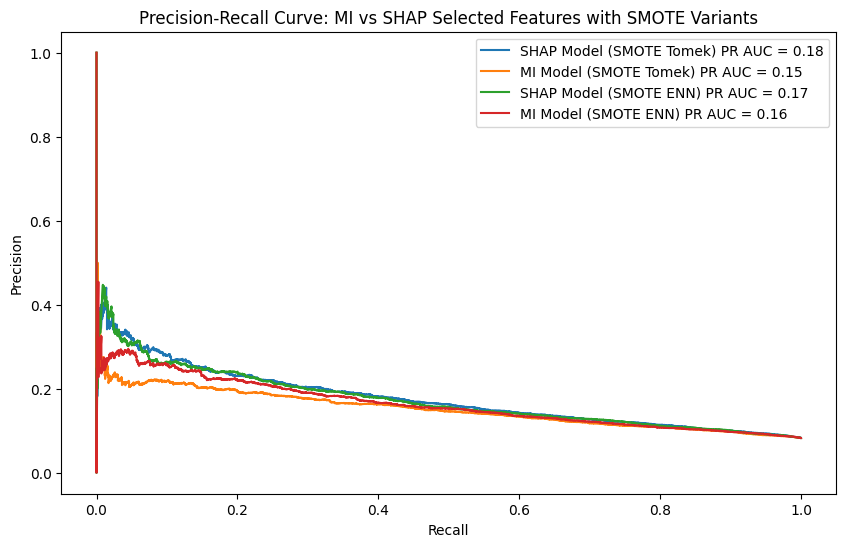

In [ ]:
# Step 10: Plot PR AUC Curves
pr_auc_shap_tomek = auc(recall_shap_tomek, precision_shap_tomek)
pr_auc_mi_tomek = auc(recall_mi_tomek, precision_mi_tomek)
pr_auc_shap_enn = auc(recall_shap_enn, precision_shap_enn)
pr_auc_mi_enn = auc(recall_mi_enn, precision_mi_enn)

plt.figure(figsize=(10, 6))
plt.plot(recall_shap_tomek, precision_shap_tomek, label=f'SHAP Model (SMOTE Tomek) PR AUC = {pr_auc_shap_tomek:.2f}')
plt.plot(recall_mi_tomek, precision_mi_tomek, label=f'MI Model (SMOTE Tomek) PR AUC = {pr_auc_mi_tomek:.2f}')
plt.plot(recall_shap_enn, precision_shap_enn, label=f'SHAP Model (SMOTE ENN) PR AUC = {pr_auc_shap_enn:.2f}')
plt.plot(recall_mi_enn, precision_mi_enn, label=f'MI Model (SMOTE ENN) PR AUC = {pr_auc_mi_enn:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features with SMOTE Variants')
plt.legend()
plt.show()

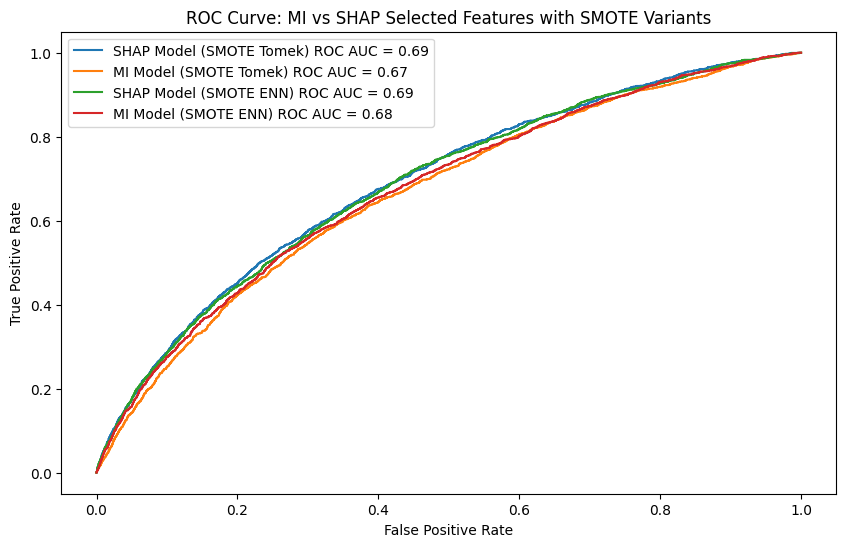

In [ ]:
# Step 11: Plot ROC Curves
fpr_shap_tomek, tpr_shap_tomek, _ = roc_curve(y_test, y_prob_shap_tomek)
fpr_mi_tomek, tpr_mi_tomek, _ = roc_curve(y_test, y_prob_mi_tomek)
fpr_shap_enn, tpr_shap_enn, _ = roc_curve(y_test, y_prob_shap_enn)
fpr_mi_enn, tpr_mi_enn, _ = roc_curve(y_test, y_prob_mi_enn)

roc_auc_shap_tomek = roc_auc_score(y_test, y_prob_shap_tomek)
roc_auc_mi_tomek = roc_auc_score(y_test, y_prob_mi_tomek)
roc_auc_shap_enn = roc_auc_score(y_test, y_prob_shap_enn)
roc_auc_mi_enn = roc_auc_score(y_test, y_prob_mi_enn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_shap_tomek, tpr_shap_tomek, label=f'SHAP Model (SMOTE Tomek) ROC AUC = {roc_auc_shap_tomek:.2f}')
plt.plot(fpr_mi_tomek, tpr_mi_tomek, label=f'MI Model (SMOTE Tomek) ROC AUC = {roc_auc_mi_tomek:.2f}')
plt.plot(fpr_shap_enn, tpr_shap_enn, label=f'SHAP Model (SMOTE ENN) ROC AUC = {roc_auc_shap_enn:.2f}')
plt.plot(fpr_mi_enn, tpr_mi_enn, label=f'MI Model (SMOTE ENN) ROC AUC = {roc_auc_mi_enn:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features with SMOTE Variants')
plt.legend()
plt.show()

*E3 XGBoost*

In [ ]:
# Step 1: Initialize the resampling techniques
smote_tomek = SMOTETomek(random_state=42)
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTETomek and SMOTEENN for SHAP and MI selected features
X_train_mi_resampled_tomek, y_train_mi_resampled_tomek = smote_tomek.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_tomek, y_train_shap_resampled_tomek = smote_tomek.fit_resample(X_train_shap, y_train)

X_train_mi_resampled_enn, y_train_mi_resampled_enn = smote_enn.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_enn, y_train_shap_resampled_enn = smote_enn.fit_resample(X_train_shap, y_train)

In [ ]:
# Step 2: Define Parameter Grid for Randomized Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10, 50, 100]  # Emphasize minority class more
}

In [ ]:
# Step 3: Function to perform RandomizedSearchCV and evaluate model
def perform_random_search(X_train_resampled, y_train_resampled, X_test, selected_features, model_name):
    xgb = XGBClassifier(eval_metric='logloss', random_state=42)

    random_search = RandomizedSearchCV(
        xgb,
        param_distributions=param_grid_xgb,
        n_iter=10,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train_resampled[selected_features], y_train_resampled)
    best_model = random_search.best_estimator_

    # Predict probabilities and evaluate
    y_prob = best_model.predict_proba(X_test[selected_features])[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"\nBest {model_name} Model AUC: {auc_score:.4f}")
    print(f"Classification Report for {model_name}-Selected Features Model:")
    print(classification_report(y_test, y_pred))

    return best_model, y_prob

In [ ]:
# Step 4: Apply Randomized Search on SHAP and MI-selected features with SMOTE Tomek
print("Using SMOTE Tomek")
best_model_shap_tomek, y_prob_shap_tomek = perform_random_search(X_train_shap_resampled_tomek, y_train_shap_resampled_tomek, X_test, selected_features_shap, "SHAP (SMOTE Tomek)")
best_model_mi_tomek, y_prob_mi_tomek = perform_random_search(X_train_mi_resampled_tomek, y_train_mi_resampled_tomek, X_test, selected_features_mi, "MI (SMOTE Tomek)")


Using SMOTE Tomek


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:22:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best SHAP (SMOTE Tomek) Model AUC: 0.6900
Classification Report for SHAP (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     20894
         1.0       0.15      0.61      0.23      1882

    accuracy                           0.67     22776
   macro avg       0.55      0.64      0.51     22776
weighted avg       0.88      0.67      0.75     22776



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:23:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best MI (SMOTE Tomek) Model AUC: 0.6253
Classification Report for MI (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71     20894
         1.0       0.11      0.61      0.19      1882

    accuracy                           0.57     22776
   macro avg       0.53      0.59      0.45     22776
weighted avg       0.87      0.57      0.67     22776



In [ ]:
# Step 5: Apply Randomized Search on SHAP and MI-selected features with SMOTE ENN
print("Using SMOTE ENN")
best_model_shap_enn, y_prob_shap_enn = perform_random_search(X_train_shap_resampled_enn, y_train_shap_resampled_enn, X_test, selected_features_shap, "SHAP (SMOTE ENN)")
best_model_mi_enn, y_prob_mi_enn = perform_random_search(X_train_mi_resampled_enn, y_train_mi_resampled_enn, X_test, selected_features_mi, "MI (SMOTE ENN)")


Using SMOTE ENN

Best SHAP (SMOTE ENN) Model AUC: 0.6870
Classification Report for SHAP (SMOTE ENN)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72     20894
         1.0       0.13      0.69      0.22      1882

    accuracy                           0.59     22776
   macro avg       0.54      0.63      0.47     22776
weighted avg       0.89      0.59      0.68     22776


Best MI (SMOTE ENN) Model AUC: 0.6419
Classification Report for MI (SMOTE ENN)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.95      0.49      0.64     20894
         1.0       0.11      0.70      0.19      1882

    accuracy                           0.50     22776
   macro avg       0.53      0.59      0.42     22776
weighted avg       0.88      0.50      0.61     22776



In [ ]:
# Step 6: Adjust the decision threshold for both SMOTE Tomek and SMOTE ENN
y_prob_shap_tomek = best_model_shap_tomek.predict_proba(X_test[selected_features_shap])[:, 1]
y_prob_mi_tomek = best_model_mi_tomek.predict_proba(X_test[selected_features_mi])[:, 1]
y_prob_shap_enn = best_model_shap_enn.predict_proba(X_test[selected_features_shap])[:, 1]
y_prob_mi_enn = best_model_mi_enn.predict_proba(X_test[selected_features_mi])[:, 1]

# Step 7: Calculate Precision-Recall Curves
precision_shap_tomek, recall_shap_tomek, thresholds_shap_tomek = precision_recall_curve(y_test, y_prob_shap_tomek)
precision_mi_tomek, recall_mi_tomek, thresholds_mi_tomek = precision_recall_curve(y_test, y_prob_mi_tomek)
precision_shap_enn, recall_shap_enn, thresholds_shap_enn = precision_recall_curve(y_test, y_prob_shap_enn)
precision_mi_enn, recall_mi_enn, thresholds_mi_enn = precision_recall_curve(y_test, y_prob_mi_enn)

# Step 8: Find the optimal threshold using F1 score
def find_optimal_threshold(precision, recall, thresholds):
    # Avoid division by zero by adding a small epsilon value or using conditional logic
    fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall + 1e-9))
    optimal_idx = np.argmax(fscore)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

optimal_threshold_shap_tomek = find_optimal_threshold(precision_shap_tomek, recall_shap_tomek, thresholds_shap_tomek)
optimal_threshold_mi_tomek = find_optimal_threshold(precision_mi_tomek, recall_mi_tomek, thresholds_mi_tomek)
optimal_threshold_shap_enn = find_optimal_threshold(precision_shap_enn, recall_shap_enn, thresholds_shap_enn)
optimal_threshold_mi_enn = find_optimal_threshold(precision_mi_enn, recall_mi_enn, thresholds_mi_enn)

print(f"\nOptimal Threshold for SHAP Model with SMOTE Tomek: {optimal_threshold_shap_tomek:.4f}")
print(f"Optimal Threshold for MI Model with SMOTE Tomek: {optimal_threshold_mi_tomek:.4f}")
print(f"Optimal Threshold for SHAP Model with SMOTE ENN: {optimal_threshold_shap_enn:.4f}")
print(f"Optimal Threshold for MI Model with SMOTE ENN: {optimal_threshold_mi_enn:.4f}")



Optimal Threshold for SHAP Model with SMOTE Tomek: 0.7314
Optimal Threshold for MI Model with SMOTE Tomek: 0.7092
Optimal Threshold for SHAP Model with SMOTE ENN: 0.8487
Optimal Threshold for MI Model with SMOTE ENN: 0.8222


In [ ]:
# Step 9: Evaluate models with the new threshold
def evaluate_with_new_threshold(y_prob, optimal_threshold, model_name):
    y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_optimal)
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"\n{model_name} with Optimal Threshold - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")
    print(classification_report(y_test, y_pred_optimal))

evaluate_with_new_threshold(y_prob_shap_tomek, optimal_threshold_shap_tomek, "SHAP Model (SMOTE Tomek)")
evaluate_with_new_threshold(y_prob_mi_tomek, optimal_threshold_mi_tomek, "MI Model (SMOTE Tomek)")
evaluate_with_new_threshold(y_prob_shap_enn, optimal_threshold_shap_enn, "SHAP Model (SMOTE ENN)")
evaluate_with_new_threshold(y_prob_mi_enn, optimal_threshold_mi_enn, "MI Model (SMOTE ENN)")



SHAP Model (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.8233, AUC: 0.6900
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90     20894
         1.0       0.20      0.38      0.26      1882

    accuracy                           0.82     22776
   macro avg       0.57      0.62      0.58     22776
weighted avg       0.88      0.82      0.85     22776


MI Model (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.7366, AUC: 0.6253
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.84     20894
         1.0       0.14      0.41      0.21      1882

    accuracy                           0.74     22776
   macro avg       0.54      0.59      0.52     22776
weighted avg       0.87      0.74      0.79     22776


SHAP Model (SMOTE ENN) with Optimal Threshold - Accuracy: 0.8197, AUC: 0.6870
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90     2089

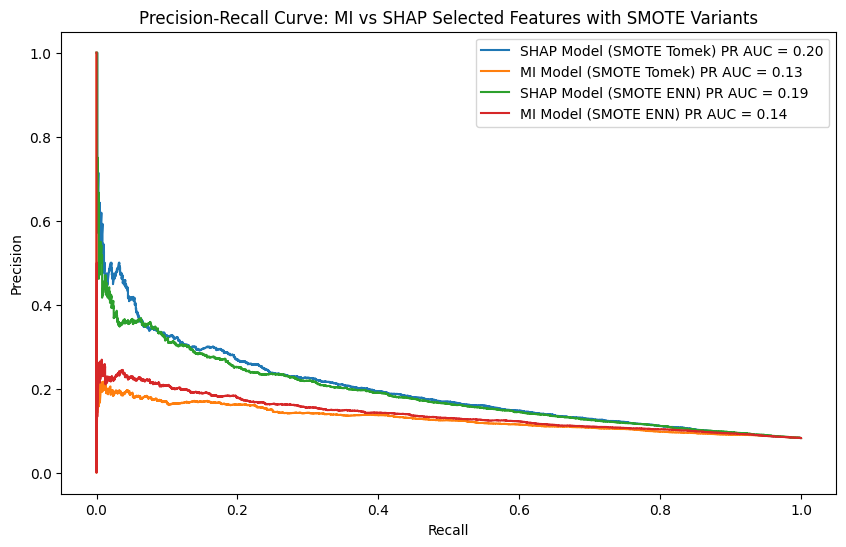

In [ ]:
# Step 10: Plot PR AUC Curves
pr_auc_shap_tomek = auc(recall_shap_tomek, precision_shap_tomek)
pr_auc_mi_tomek = auc(recall_mi_tomek, precision_mi_tomek)
pr_auc_shap_enn = auc(recall_shap_enn, precision_shap_enn)
pr_auc_mi_enn = auc(recall_mi_enn, precision_mi_enn)

plt.figure(figsize=(10, 6))
plt.plot(recall_shap_tomek, precision_shap_tomek, label=f'SHAP Model (SMOTE Tomek) PR AUC = {pr_auc_shap_tomek:.2f}')
plt.plot(recall_mi_tomek, precision_mi_tomek, label=f'MI Model (SMOTE Tomek) PR AUC = {pr_auc_mi_tomek:.2f}')
plt.plot(recall_shap_enn, precision_shap_enn, label=f'SHAP Model (SMOTE ENN) PR AUC = {pr_auc_shap_enn:.2f}')
plt.plot(recall_mi_enn, precision_mi_enn, label=f'MI Model (SMOTE ENN) PR AUC = {pr_auc_mi_enn:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: MI vs SHAP Selected Features with SMOTE Variants')
plt.legend()
plt.show()

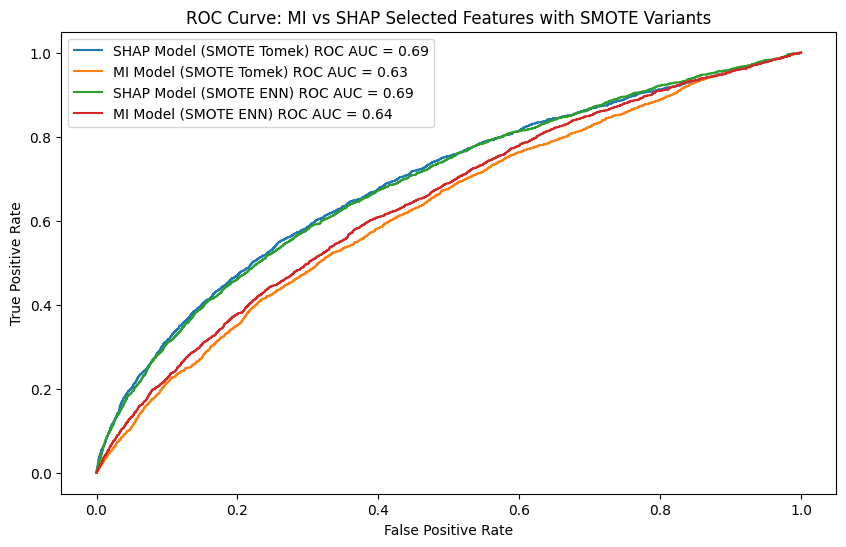

In [ ]:
# Step 11: Plot ROC Curves
fpr_shap_tomek, tpr_shap_tomek, _ = roc_curve(y_test, y_prob_shap_tomek)
fpr_mi_tomek, tpr_mi_tomek, _ = roc_curve(y_test, y_prob_mi_tomek)
fpr_shap_enn, tpr_shap_enn, _ = roc_curve(y_test, y_prob_shap_enn)
fpr_mi_enn, tpr_mi_enn, _ = roc_curve(y_test, y_prob_mi_enn)

roc_auc_shap_tomek = roc_auc_score(y_test, y_prob_shap_tomek)
roc_auc_mi_tomek = roc_auc_score(y_test, y_prob_mi_tomek)
roc_auc_shap_enn = roc_auc_score(y_test, y_prob_shap_enn)
roc_auc_mi_enn = roc_auc_score(y_test, y_prob_mi_enn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_shap_tomek, tpr_shap_tomek, label=f'SHAP Model (SMOTE Tomek) ROC AUC = {roc_auc_shap_tomek:.2f}')
plt.plot(fpr_mi_tomek, tpr_mi_tomek, label=f'MI Model (SMOTE Tomek) ROC AUC = {roc_auc_mi_tomek:.2f}')
plt.plot(fpr_shap_enn, tpr_shap_enn, label=f'SHAP Model (SMOTE ENN) ROC AUC = {roc_auc_shap_enn:.2f}')
plt.plot(fpr_mi_enn, tpr_mi_enn, label=f'MI Model (SMOTE ENN) ROC AUC = {roc_auc_mi_enn:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: MI vs SHAP Selected Features with SMOTE Variants')
plt.legend()
plt.show()

*E3 Stacked Classifier*

In [ ]:
# Step 1: Initialize SMOTE-Tomek and SMOTE-ENN
smote_tomek = SMOTETomek(random_state=42)
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE-Tomek and SMOTE-ENN for SHAP and MI selected features
X_train_mi_resampled_tomek, y_train_mi_resampled_tomek = smote_tomek.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_tomek, y_train_shap_resampled_tomek = smote_tomek.fit_resample(X_train_shap, y_train)

X_train_mi_resampled_enn, y_train_mi_resampled_enn = smote_enn.fit_resample(X_train_mi, y_train)
X_train_shap_resampled_enn, y_train_shap_resampled_enn = smote_enn.fit_resample(X_train_shap, y_train)



In [ ]:
# Step 2: Define base models for stacking
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

In [ ]:
# Step 3: Define the stacking classifier
stacked_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3, n_jobs=-1)


In [ ]:
# Step 4: Define parameter grid for Randomized Search
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [3, 6, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__gamma': [0, 0.1, 0.5],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__scale_pos_weight': [1, 10, 50, 100]
}


In [ ]:
# Step 5: Function to perform RandomizedSearchCV and evaluate model
def perform_random_search(X_train_resampled, y_train_resampled, X_test, selected_features, model_name):
    random_search = RandomizedSearchCV(
        stacked_clf,
        param_distributions=param_grid,
        n_iter=10,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train_resampled[selected_features], y_train_resampled)
    best_model = random_search.best_estimator_

    # Predict probabilities and evaluate
    y_prob = best_model.predict_proba(X_test[selected_features])[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"\nBest {model_name} Model AUC: {auc_score:.4f}")
    print(f"Classification Report for {model_name}-Selected Features Model:")
    print(classification_report(y_test, y_pred))

    return best_model, y_prob

In [ ]:
# Step 6: Apply Randomized Search on SHAP and MI-selected features with SMOTE Tomek
print("Using SMOTE Tomek")
best_model_shap_tomek, y_prob_shap_tomek = perform_random_search(X_train_shap_resampled_tomek, y_train_shap_resampled_tomek, X_test, selected_features_shap, "SHAP (SMOTE Tomek)")
best_model_mi_tomek, y_prob_mi_tomek = perform_random_search(X_train_mi_resampled_tomek, y_train_mi_resampled_tomek, X_test, selected_features_mi, "MI (SMOTE Tomek)")


Using SMOTE Tomek

Best SHAP (SMOTE Tomek) Model AUC: 0.7098
Classification Report for SHAP (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88     20894
         1.0       0.20      0.48      0.28      1882

    accuracy                           0.80     22776
   macro avg       0.57      0.66      0.58     22776
weighted avg       0.89      0.80      0.83     22776


Best MI (SMOTE Tomek) Model AUC: 0.6279
Classification Report for MI (SMOTE Tomek)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     20894
         1.0       0.15      0.25      0.19      1882

    accuracy                           0.82     22776
   macro avg       0.54      0.56      0.54     22776
weighted avg       0.86      0.82      0.84     22776



In [ ]:
# Step 7: Apply Randomized Search on SHAP and MI-selected features with SMOTE ENN
print("Using SMOTE ENN")
best_model_shap_enn, y_prob_shap_enn = perform_random_search(X_train_shap_resampled_enn, y_train_shap_resampled_enn, X_test, selected_features_shap, "SHAP (SMOTE ENN)")
best_model_mi_enn, y_prob_mi_enn = perform_random_search(X_train_mi_resampled_enn, y_train_mi_resampled_enn, X_test, selected_features_mi, "MI (SMOTE ENN)")


Using SMOTE ENN

Best SHAP (SMOTE ENN) Model AUC: 0.7051
Classification Report for SHAP (SMOTE ENN)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80     20894
         1.0       0.15      0.61      0.24      1882

    accuracy                           0.68     22776
   macro avg       0.55      0.65      0.52     22776
weighted avg       0.89      0.68      0.75     22776


Best MI (SMOTE ENN) Model AUC: 0.6418
Classification Report for MI (SMOTE ENN)-Selected Features Model:
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     20894
         1.0       0.13      0.51      0.20      1882

    accuracy                           0.67     22776
   macro avg       0.53      0.60      0.50     22776
weighted avg       0.87      0.67      0.74     22776



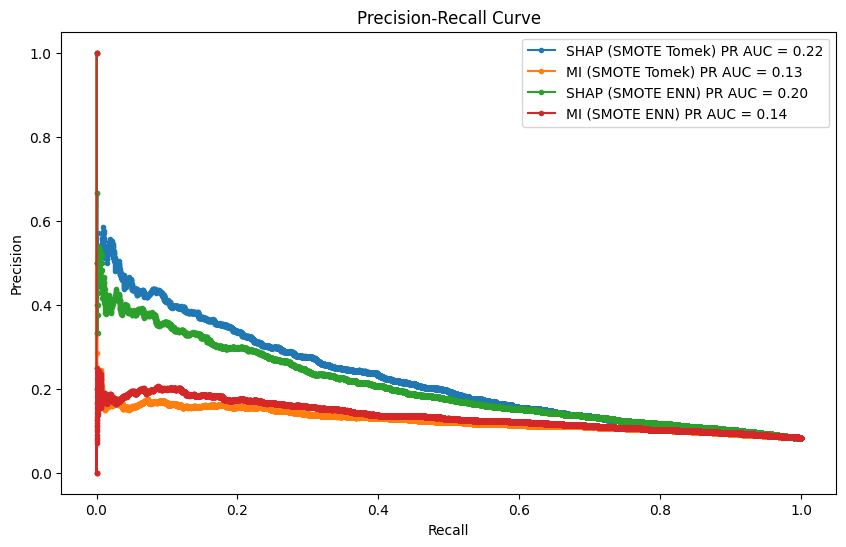

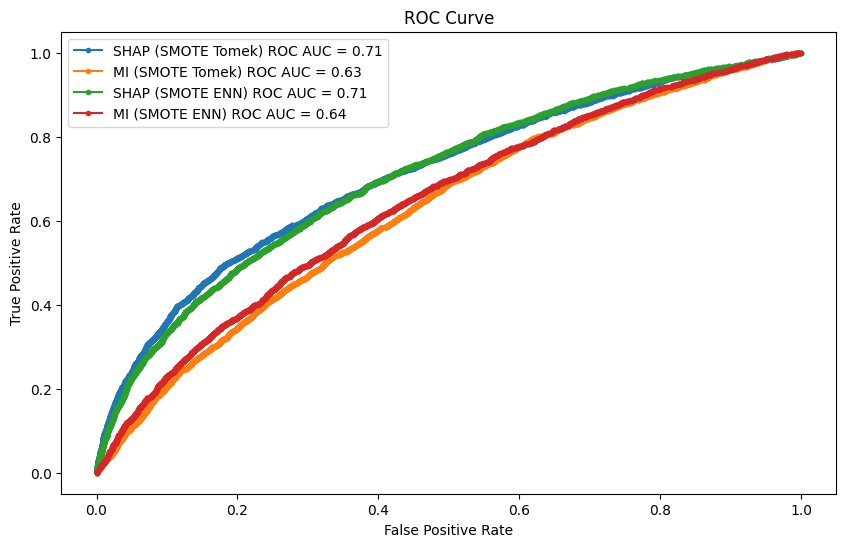

In [ ]:
# Step 8: Calculate and plot Precision-Recall and ROC Curves for all models
def plot_curves(y_test, y_probs, model_names):
    plt.figure(figsize=(10, 6))
    for y_prob, model_name in zip(y_probs, model_names):
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, marker='.', label=f'{model_name} PR AUC = {pr_auc:.2f}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for y_prob, model_name in zip(y_probs, model_names):
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, marker='.', label=f'{model_name} ROC AUC = {roc_auc:.2f}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Plot the curves
plot_curves(
    y_test,
    [y_prob_shap_tomek, y_prob_mi_tomek, y_prob_shap_enn, y_prob_mi_enn],
    ['SHAP (SMOTE Tomek)', 'MI (SMOTE Tomek)', 'SHAP (SMOTE ENN)', 'MI (SMOTE ENN)']
)

In [ ]:
# Step 9: Adjust and evaluate with new thresholds
def evaluate_with_new_threshold(y_prob, optimal_threshold, model_name):
    y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_optimal)
    auc = roc_auc_score(y_test, y_prob)
    print(f"\n{model_name} with Optimal Threshold - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred_optimal))

# Find optimal thresholds and evaluate
thresholds = []
for y_prob, model_name in zip([y_prob_shap_tomek, y_prob_mi_tomek, y_prob_shap_enn, y_prob_mi_enn],
                              ['SHAP (SMOTE Tomek)', 'MI (SMOTE Tomek)', 'SHAP (SMOTE ENN)', 'MI (SMOTE ENN)']):
    precision, recall, thresholds_temp = precision_recall_curve(y_test, y_prob)
    fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))
    optimal_idx = np.argmax(fscore)
    optimal_threshold = thresholds_temp[optimal_idx]
    thresholds.append(optimal_threshold)
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.4f}")


Optimal Threshold for SHAP (SMOTE Tomek): 0.6542
Optimal Threshold for MI (SMOTE Tomek): 0.3346
Optimal Threshold for SHAP (SMOTE ENN): 0.8282
Optimal Threshold for MI (SMOTE ENN): 0.6823


<ipython-input-74-737251d8c2be>:14: RuntimeWarning: invalid value encountered in divide
  fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))
<ipython-input-74-737251d8c2be>:14: RuntimeWarning: invalid value encountered in divide
  fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))


In [ ]:
# Step 10: Evaluate with optimal thresholds
for y_prob, optimal_threshold, model_name in zip([y_prob_shap_tomek, y_prob_mi_tomek, y_prob_shap_enn, y_prob_mi_enn],
                                                 thresholds,
                                                 ['SHAP (SMOTE Tomek)', 'MI (SMOTE Tomek)', 'SHAP (SMOTE ENN)', 'MI (SMOTE ENN)']):
    evaluate_with_new_threshold(y_prob, optimal_threshold, model_name)


SHAP (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.8450, AUC: 0.7098
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91     20894
         1.0       0.24      0.40      0.30      1882

    accuracy                           0.85     22776
   macro avg       0.59      0.64      0.61     22776
weighted avg       0.88      0.85      0.86     22776


MI (SMOTE Tomek) with Optimal Threshold - Accuracy: 0.7295, AUC: 0.6279
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84     20894
         1.0       0.13      0.40      0.20      1882

    accuracy                           0.73     22776
   macro avg       0.53      0.58      0.52     22776
weighted avg       0.87      0.73      0.78     22776


SHAP (SMOTE ENN) with Optimal Threshold - Accuracy: 0.8333, AUC: 0.7051
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91     20894
         1.0    

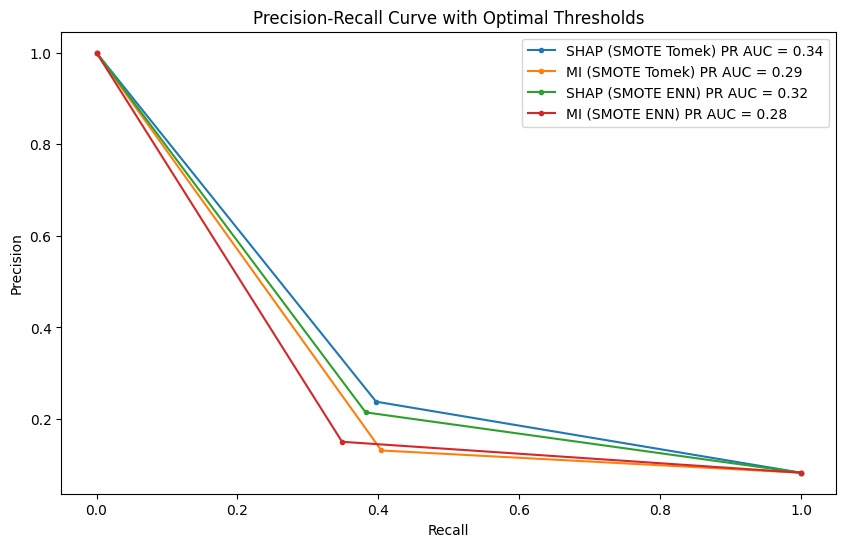

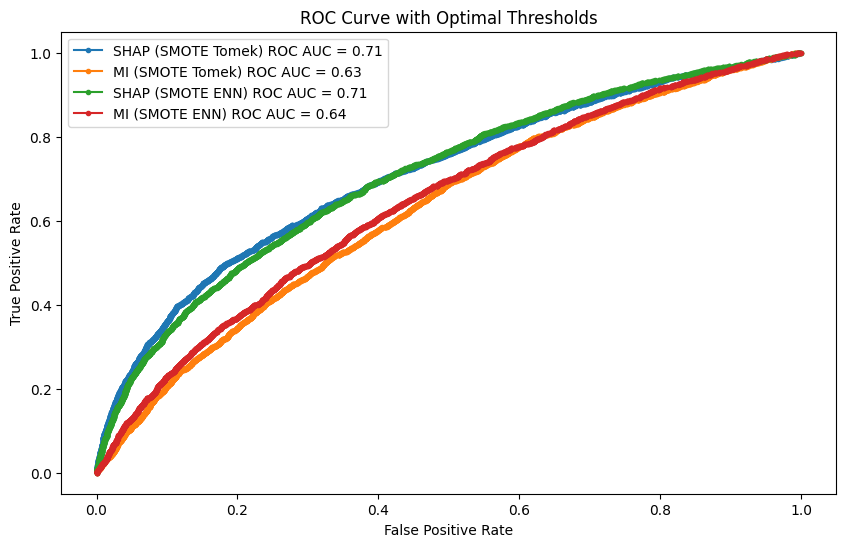

In [ ]:
# Step 11: Adjust and evaluate with new thresholds
def evaluate_with_new_threshold(y_prob, optimal_threshold):
    y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
    return y_pred_optimal

# Find optimal thresholds with epsilon to prevent division by zero
optimal_thresholds = []
epsilon = 1e-10  # Small value to avoid division by zero

for y_prob in [y_prob_shap_tomek, y_prob_mi_tomek, y_prob_shap_enn, y_prob_mi_enn]:
    precision, recall, thresholds_temp = precision_recall_curve(y_test, y_prob)
    fscore = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall + epsilon))
    optimal_idx = np.argmax(fscore)
    optimal_threshold = thresholds_temp[optimal_idx]
    optimal_thresholds.append(optimal_threshold)

# Calculate optimal predictions
y_preds_optimal = [evaluate_with_new_threshold(y_prob, opt_threshold) for y_prob, opt_threshold in zip(
    [y_prob_shap_tomek, y_prob_mi_tomek, y_prob_shap_enn, y_prob_mi_enn], optimal_thresholds
)]

# Function to plot Precision-Recall and ROC Curves for all models with optimal thresholds
def plot_curves_with_optimal_thresholds(y_test, y_probs, y_preds_optimal, model_names):
    # Plot Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for y_prob, y_pred_optimal, model_name in zip(y_probs, y_preds_optimal, model_names):
        precision, recall, _ = precision_recall_curve(y_test, y_pred_optimal)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, marker='.', label=f'{model_name} PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve with Optimal Thresholds')
    plt.legend()
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(10, 6))
    for y_prob, y_pred_optimal, model_name in zip(y_probs, y_preds_optimal, model_names):
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, marker='.', label=f'{model_name} ROC AUC = {roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Optimal Thresholds')
    plt.legend()
    plt.show()

# Plot the curves using your predicted probabilities and optimal predictions
plot_curves_with_optimal_thresholds(
    y_test,
    [y_prob_shap_tomek, y_prob_mi_tomek, y_prob_shap_enn, y_prob_mi_enn],
    y_preds_optimal,
    ['SHAP (SMOTE Tomek)', 'MI (SMOTE Tomek)', 'SHAP (SMOTE ENN)', 'MI (SMOTE ENN)']
)